# Data Science Project -  StockX DataSet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import string
from numpy import arange
import joblib
import os
import re

# Identify The Problem

Text

# Get The Data

## Public StockX Dataset

I started by acquiring the public StockX DataSet that was mage available for an online challenge.

In [7]:
public_stockx = pd.read_excel('/Users/davidtassignon/Documents/DataScience/Projects/StockX_Sneaker_Project/StockX-Data-Contest-2019.xlsx')
public_stockx.head(3)

Order Date   Brand                                 Sneaker Name  Sale Price  \
0 2017-09-01   Yeezy         Adidas-Yeezy-Boost-350-Low-V2-Beluga      1097.0   
1 2017-09-01   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Copper       685.0   
2 2017-09-01   Yeezy   Adidas-Yeezy-Boost-350-V2-Core-Black-Green       690.0   

   Retail Price Release Date  Shoe Size Buyer Region  
0           220   2016-09-24       11.0   California  
1           220   2016-11-23       11.0   California  
2           220   2016-11-23       11.0   California

For convenience I changed the column names to lowercases and replaced the spaces with an underscore. Besides this, I converted the values in the columns brand, sneaker name and buyer region to lowercases and replaced the dashes in the values of the column sneaker name to spaces.

In [8]:
letters = string.ascii_uppercase + string.ascii_lowercase
public_stockx.columns = [('').join([letter.lower() if letter in letters 
                            else '_' if ((i>0) and (i!=len(columnname)-1))
                            else ''
                            for i, letter in enumerate(columnname)])
                         for columnname in public_stockx.columns]

for variable in ['brand', 'sneaker_name', 'buyer_region']:
    public_stockx[variable] = public_stockx[variable].str.lower()

public_stockx['sneaker_name'] = public_stockx['sneaker_name'].apply(lambda x: x.replace('-', ' '))
public_stockx.head(3)

order_date   brand                                 sneaker_name  sale_price  \
0 2017-09-01   yeezy         adidas yeezy boost 350 low v2 beluga      1097.0   
1 2017-09-01   yeezy  adidas yeezy boost 350 v2 core black copper       685.0   
2 2017-09-01   yeezy   adidas yeezy boost 350 v2 core black green       690.0   

   retail_price release_date  shoe_size buyer_region  
0           220   2016-09-24       11.0   california  
1           220   2016-11-23       11.0   california  
2           220   2016-11-23       11.0   california

## Unofficial StockX API

I started by creating a list of all the sneaker names that are in the public stockx dataset.

In [9]:
sneakernames = []
for sneaker_name in public_stockx['sneaker_name']:
    if sneaker_name not in sneakernames:
        sneakernames.append(sneaker_name)
    else:
        continue

To access the information from the API I iterated over the sneakers in the list of sneakernames, resulting in a large sneaker dictionary. To get the information I needed for my project, I created a working sneaker dictionary which I thereafter turned into a pandas dataframe.

In [10]:
from stockxsdk import Stockx
stockx_ = Stockx()

large_sneaker_dict = {}
for sneakername in sneakernames:
    large_sneaker_dict[sneakername] = stockx_.search(sneakername)

working_sneaker_dict = {}
for sneakername in sneakernames:
    working_sneaker_dict[sneakername] = large_sneaker_dict[sneakername][0]
    
api_stockx = pd.DataFrame.from_dict(working_sneaker_dict, orient = 'index')
api_stockx.head(1)

id  \
adidas yeezy boost 350 low v2 beluga  cc3f95f8-899c-4a97-a9ea-6e375385381b   

                                                                      uuid  \
adidas yeezy boost 350 low v2 beluga  cc3f95f8-899c-4a97-a9ea-6e375385381b   

                                                                  name  \
adidas yeezy boost 350 low v2 beluga  adidas Yeezy Boost 350 V2 Beluga   

                                       brand  \
adidas yeezy boost 350 low v2 beluga  adidas   

                                                                          thumbnail_url  \
adidas yeezy boost 350 low v2 beluga  https://stockx.imgix.net/images/Adidas-Yeezy-B...   

                                                                                  media  \
adidas yeezy boost 350 low v2 beluga  {'imageUrl': 'https://stockx.imgix.net/images/...   

                                                                                    url  \
adidas yeezy boost 350 low v2 beluga  adidas-yeezy-boost-350-v2-steeple-grey-beluga-...   

                                     release_date       categories  \
adidas yeezy boost 350 low v2 beluga   2016-09-24  [adidas, Yeezy]   

                                     product_category  ... new_release  \
adidas yeezy boost 350 low v2 beluga         sneakers  ...         0.0   

                                     featured lock_selling  \
adidas yeezy boost 350 low v2 beluga        1        False   

                                                                      selling_countries  \
adidas yeezy boost 350 low v2 beluga  [AD, AE, AG, AL, AR, AS, AT, AU, BA, BB, BE, B...   

                                                                       buying_countries  \
adidas yeezy boost 350 low v2 beluga  [AD, AE, AG, AI, AL, AM, AO, AR, AS, AT, AU, A...   

                                                                                 Traits  \
adidas yeezy boost 350 low v2 beluga  [{'name': 'Style', 'value': 'BB1826', 'filtera...   

                                                                      searchable_traits  \
adidas yeezy boost 350 low v2 beluga  {'Colorway': 'Steeple Gray/Beluga/Solar Red', ...   

                                                                  objectID  \
adidas yeezy boost 350 low v2 beluga  cc3f95f8-899c-4a97-a9ea-6e375385381b   

                                                                       _highlightResult  \
adidas yeezy boost 350 low v2 beluga  {'name': {'value': '<em>adidas</em> <em>Yeezy<...   

                                      traits  
adidas yeezy boost 350 low v2 beluga     NaN  

[1 rows x 37 columns]

As the api stockx dataframe has a lot of variables, I selected the ones that were usefull for my research goal.

In [11]:
selected_api_stockx = api_stockx.drop(columns=['uuid','thumbnail_url','product_category','ticker_symbol',
                                               'short_description','gender','last_sale', 'media', 'description',
                                               'sales_last_72','quality_bid','active','new_release','lock_selling',
                                               'selling_countries','buying_countries','Traits','searchable_traits',
                                               '_highlightResult','Traits','objectID', 'brand', 'release_date', 'model',
                                               'price', 'categories', 'url', 'id', 'total_dollars', 'name', 'traits',
                                               'highest_bid','lowest_ask','deadstock_sold','featured'])

selected_api_stockx.reset_index(level=0, inplace=True)
selected_api_stockx = selected_api_stockx.rename(columns={'index': 'sneaker_name'})

In [12]:
selected_api_stockx.head(3)

sneaker_name style_id  \
0         adidas yeezy boost 350 low v2 beluga   BB1826   
1  adidas yeezy boost 350 v2 core black copper   BY1605   
2   adidas yeezy boost 350 v2 core black green   BY9611   

                        make                       colorway  
0  adidas Yeezy Boost 350 V2  Steeple Gray/Beluga/Solar Red  
1  adidas Yeezy Boost 350 V2   Core Black/Copper/Core Black  
2  adidas Yeezy Boost 350 V2    Core Black/Green/Core Black

## Merging the two DataFrames

In [13]:
stockx_df = pd.merge(public_stockx, selected_api_stockx, on=['sneaker_name'])

## Feature Engineering

### Target Variable - ROI

In [14]:
stockx_df['ROI'] = round(((stockx_df['sale_price'] - stockx_df['retail_price'])
                       /stockx_df['retail_price'])*100,2)

### Day since Release date

In [15]:
stockx_df['day_since_release'] = (stockx_df['order_date'] - stockx_df['release_date']).dt.days.astype('int64')
stockx_df = stockx_df[stockx_df['day_since_release'] > -30]

### Within 1 year variable

In [16]:
stockx_df['within_1years'] = [1 if x <= 365 else 0 for x in stockx_df['day_since_release']]

### Month, Week, Day variables

In [17]:
stockx_df['month'] = stockx_df.order_date.dt.month
stockx_df['week'] = stockx_df.order_date.dt.week
stockx_df['day'] = stockx_df.order_date.dt.weekday

### Colorway

In [18]:
stockx_df['colorway'] = stockx_df['colorway'].apply(lambda x: x.strip()).replace('', np.nan)
stockx_df = stockx_df.dropna().reset_index(drop=True)

stockx_df['colorway'] = stockx_df['colorway'].apply(lambda x: x.lower())
stockx_df['colorway'] = stockx_df['colorway'].apply(lambda x: x.replace('-', ' ')).astype('object')
colorway_df = stockx_df['colorway'].str.get_dummies(sep='/')

stockx_df['colorway'] = stockx_df['colorway'].apply(lambda x: x.replace('/', ' '))
colors_df = stockx_df['colorway'].str.get_dummies(sep=' ')

stockx_df = pd.concat([stockx_df, colors_df], axis=1)
stockx_df = pd.concat([stockx_df, colorway_df], axis=1)

stockx_df = stockx_df.loc[:, ~stockx_df.columns.duplicated()]

stockx_df['grey'] = stockx_df['grey'] + stockx_df['gray']
stockx_df = stockx_df.drop('gray', axis =1)

### Difference in Release 2

For the modelling part, to make use of the variable 'day_since_release', I shifted the values with +29, so that -30 is day 0 and day 30 is the release date. Now it's possible to see the influence of when the sneaker is resold. 

In [21]:
stockx_df['day_since_release_2'] = stockx_df['day_since_release'].add(29)

### Subsetting the Data to Day since Release Date within 1 year

In [22]:
stockx_df1y = stockx_df[stockx_df['within_1years'] == 1]

# Explore The Data

## Visualizations

In [355]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.axes_style('whitegrid')
sns.set_context('talk')

### Target Variable - ROI

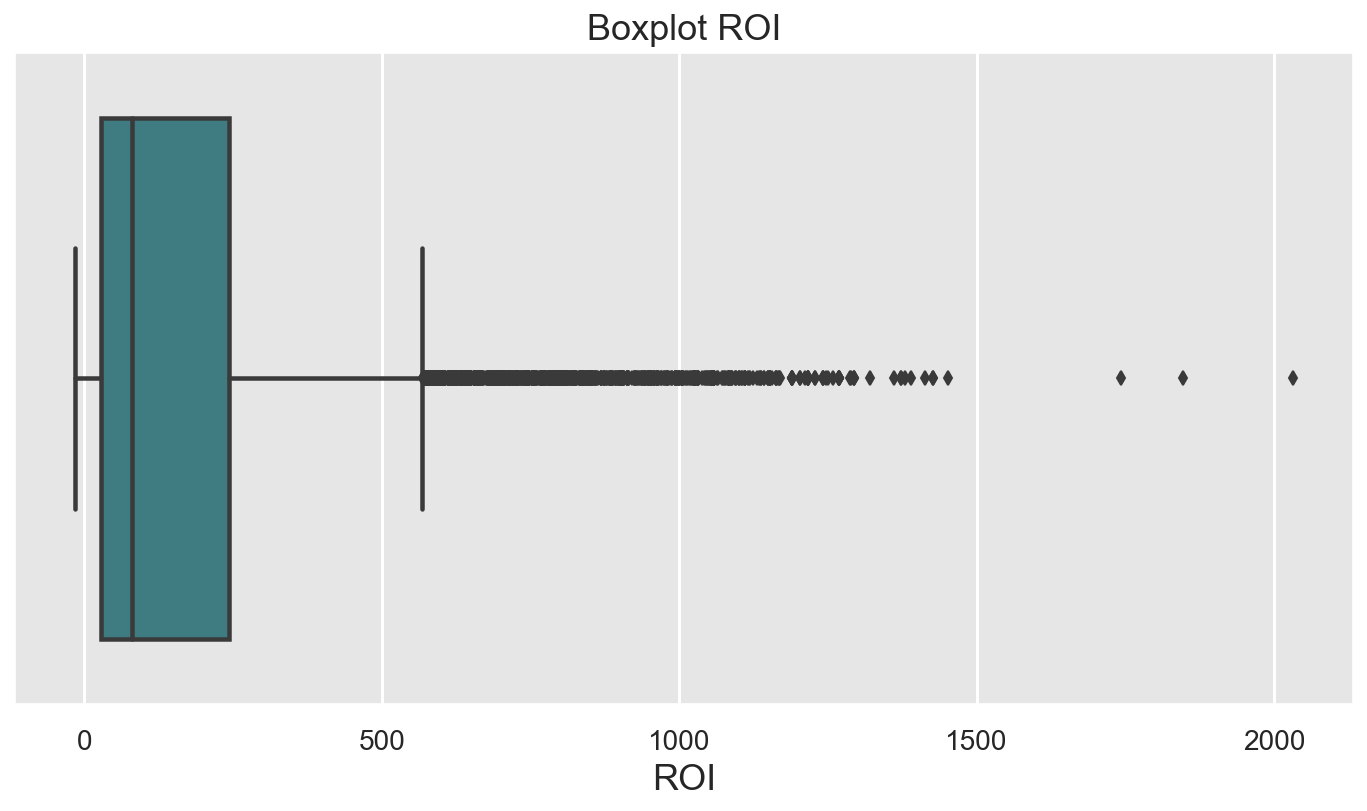

In [551]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.boxplot(x=stockx_df1y['ROI'], palette = 'crest')
plt.title('Boxplot ROI')
plt.xlabel('ROI')
plt.tick_params(labelsize=14)
plt.show()

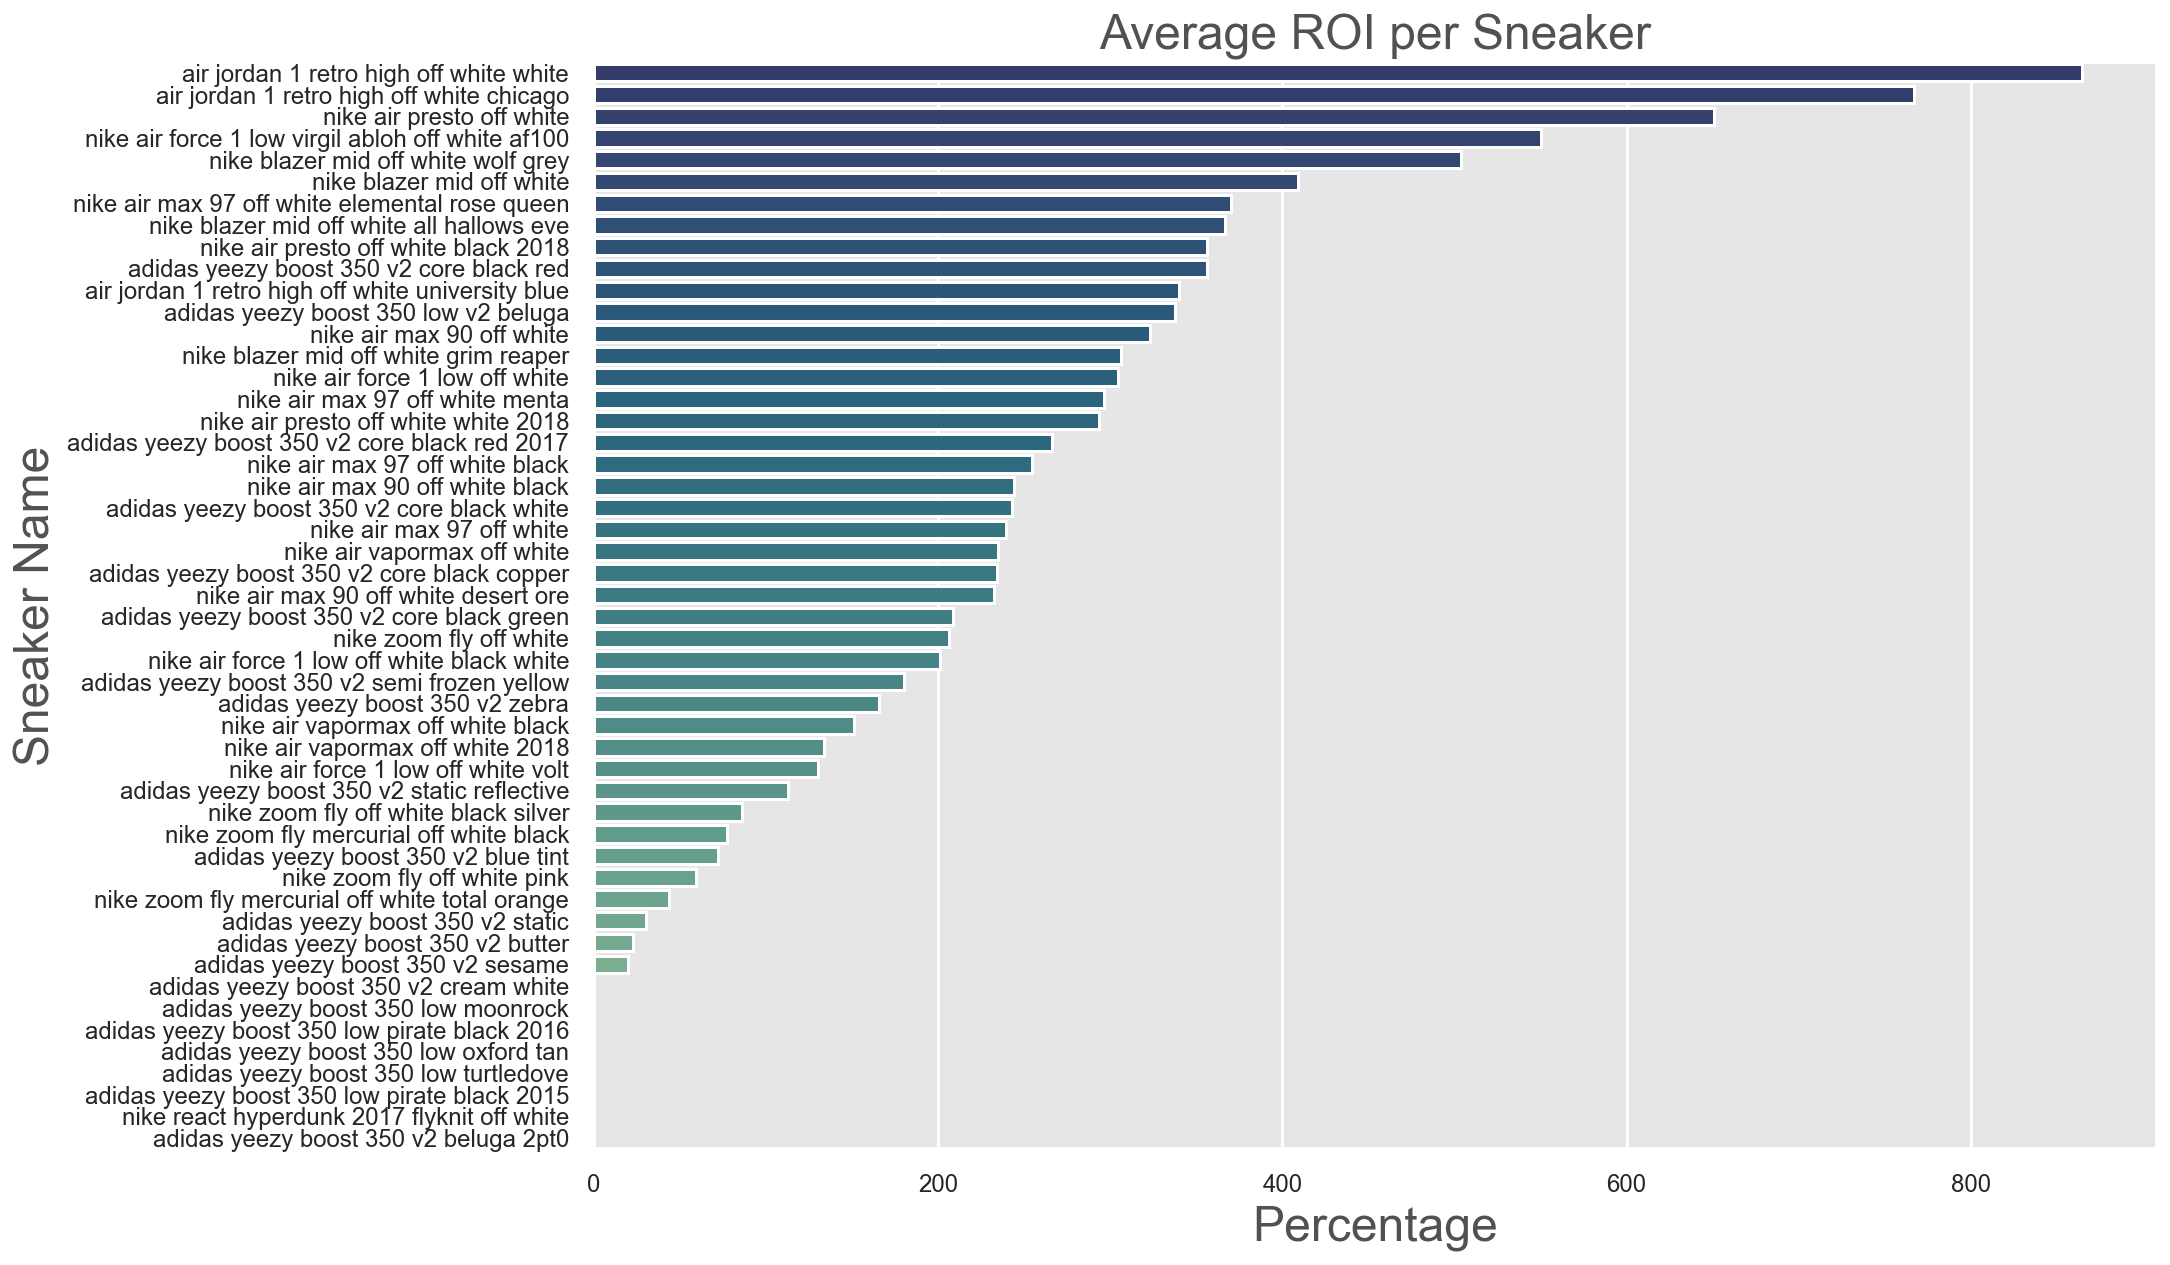

In [356]:
average_ROI = stockx_df1y[['sneaker_name', 'ROI']]

avg_ROI = []
for sneaker in sneakernames:
    row = average_ROI.loc[average_ROI['sneaker_name'] == sneaker]
    avg_ROI.append(round(row.mean()[0],2))

average_ROI_df = pd.DataFrame(columns = ['sneaker_name', 'ROI'])
average_ROI_df['sneaker_name'] = pd.Series(sneakernames)
average_ROI_df['ROI'] = pd.Series(avg_ROI)

fig, ax = plt.subplots(figsize=(14,10))

ROI_plot = average_ROI_df.sort_values(by='ROI', ascending = False)
#ROI_plot_top_20 = ROI_plot[:20]
ax = sns.barplot(x='ROI', y='sneaker_name', data=ROI_plot, palette = 'crest_r')

plt.title('Average ROI per Sneaker', fontsize = 24, alpha=0.8)
plt.xlabel('Percentage', fontsize = 24, alpha=0.8)
plt.ylabel('Sneaker Name', fontsize = 24, alpha=0.8)
plt.tick_params(labelsize=14)
ax.tick_params(axis = 'x', labelsize=12)
ax.tick_params(axis = 'y', labelsize=12)
plt.show()

### Brand

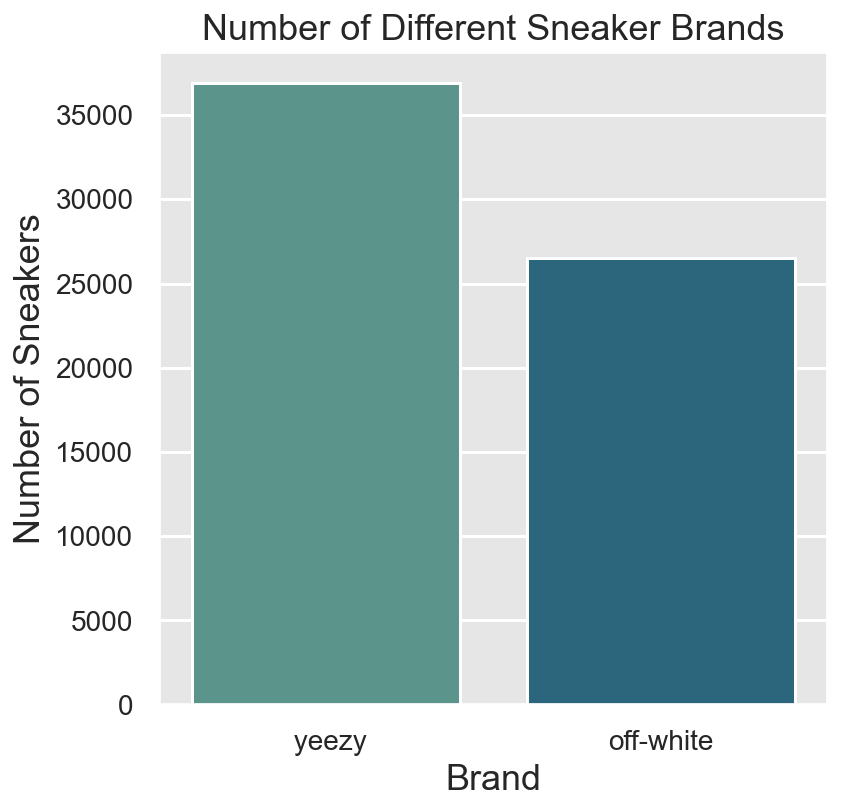

In [358]:
brand_df = stockx_df1y.groupby('brand')['sneaker_name'].count().sort_values(ascending = False)
brand_df = pd.DataFrame(brand_df).reset_index()

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.barplot(x='brand', y='sneaker_name', data=brand_df, palette='crest')
plt.title('Number of Different Sneaker Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Sneakers')
plt.tick_params(labelsize=14)
plt.show()

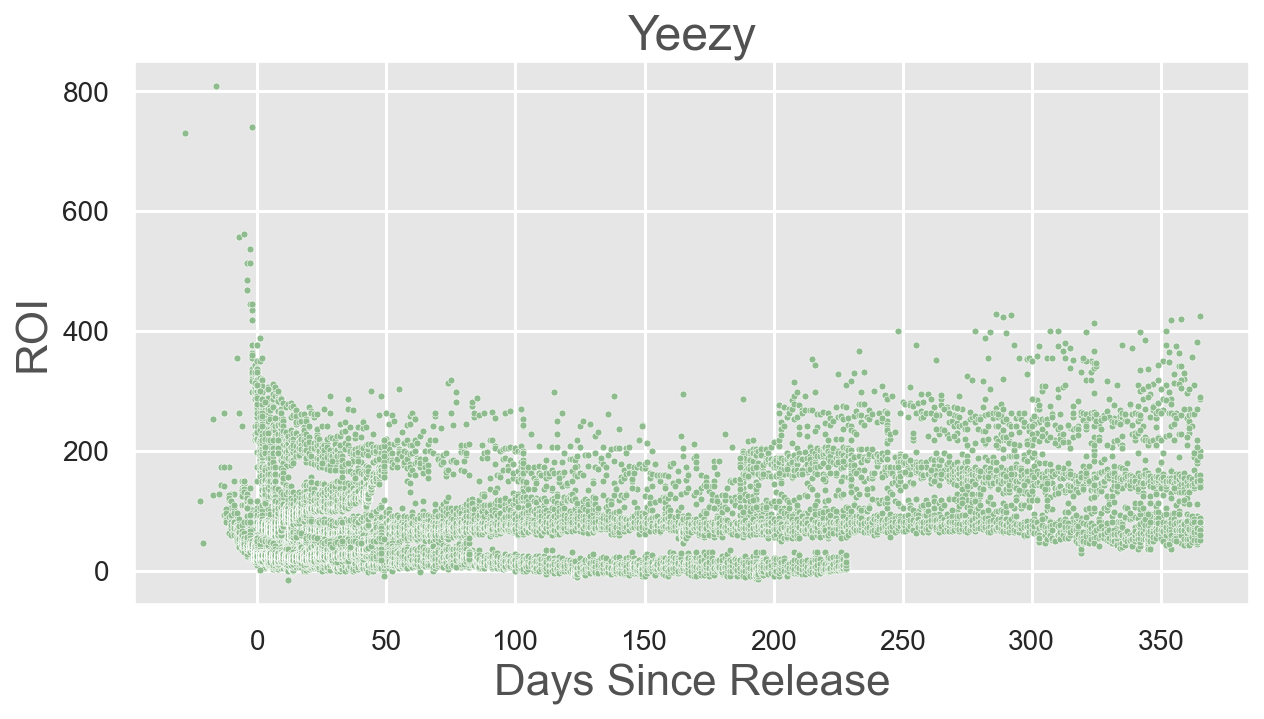

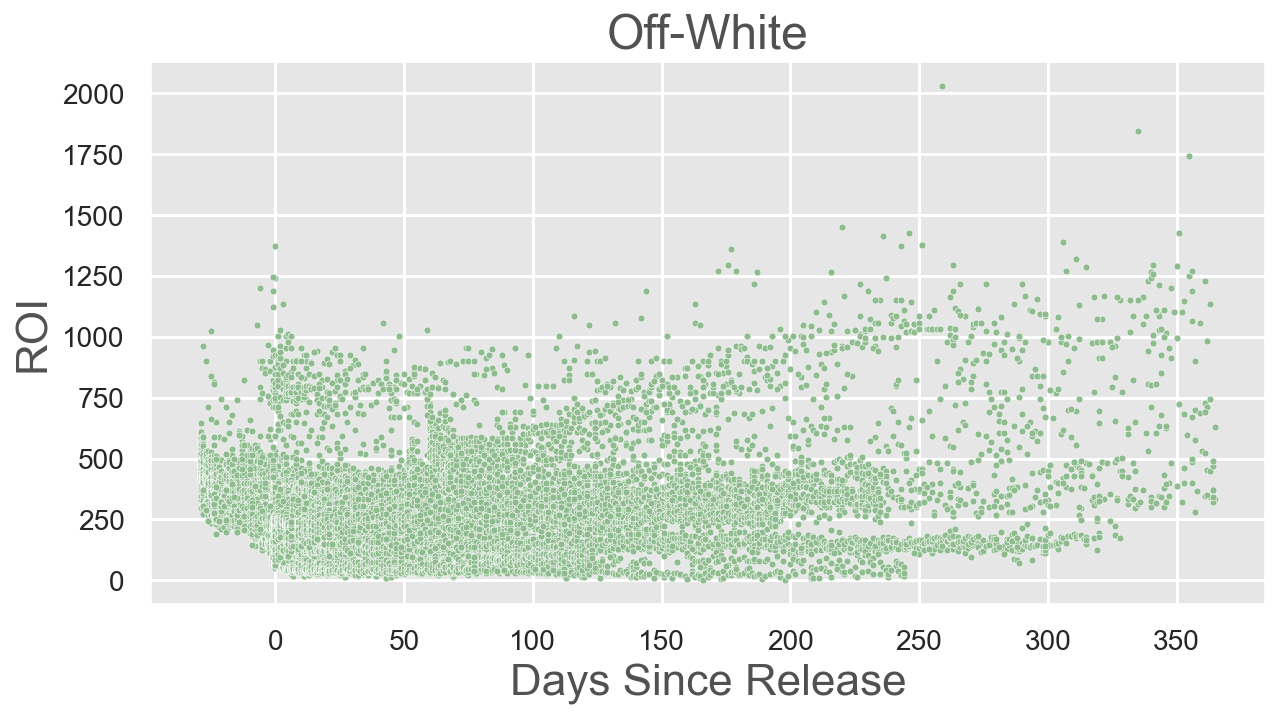

In [360]:
plt.figure(figsize = (10,5))

yeezy = stockx_df1y[stockx_df1y.brand == ' yeezy']
sns.scatterplot(data=yeezy, x='day_since_release', y='ROI', color ='darkseagreen', s=12)
plt.xlabel('Days Since Release',fontsize = 22, alpha =0.8)
plt.ylabel('ROI',fontsize = 22, alpha =0.8)
plt.title('Yeezy',fontsize = 24, alpha =0.8)
plt.tick_params(labelsize=14)
ax.tick_params(axis = 'x', labelsize=14)
ax.tick_params(axis = 'y', labelsize=12)
plt.show()

plt.figure(figsize = (10,5))
off_white = stockx_df1y[stockx_df1y.brand == 'off-white']
sns.scatterplot(data=off_white, x='day_since_release', y='ROI', color ='darkseagreen', s=12)
plt.xlabel('Days Since Release',fontsize = 22, alpha =0.8)
plt.ylabel('ROI',fontsize = 22, alpha =0.8)
plt.title('Off-White', fontsize = 24, alpha =0.8)
plt.tick_params(labelsize=14)
ax.tick_params(axis = 'x', labelsize=14)
ax.tick_params(axis = 'y', labelsize=12)
plt.show()

### Type

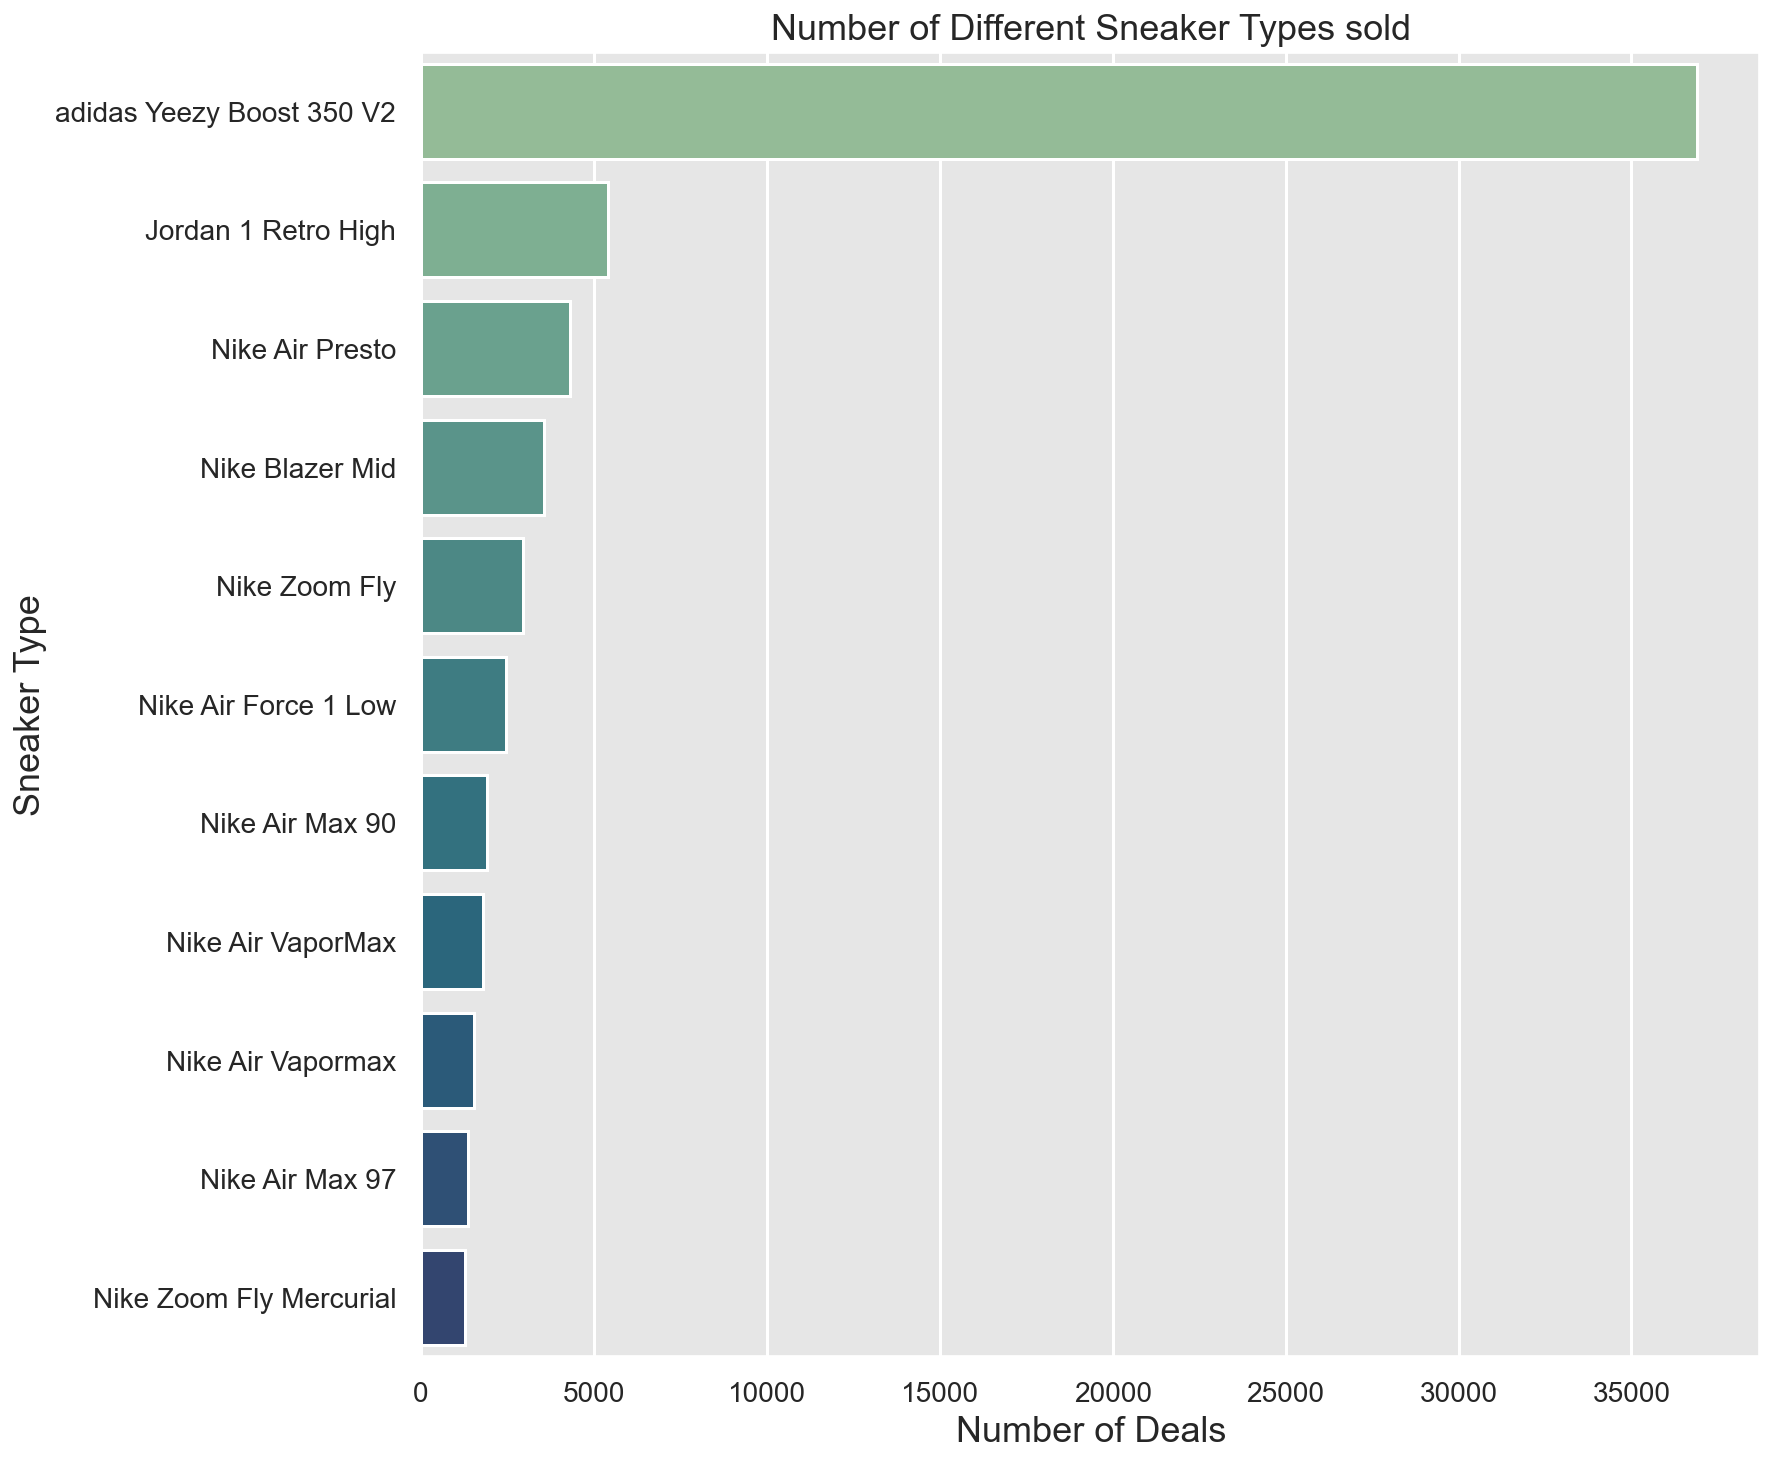

In [361]:
make_df = stockx_df1y.groupby('make')['brand'].count().sort_values(ascending = False)
make_df = pd.DataFrame(make_df).reset_index()

fig, ax = plt.subplots(figsize=(12,12))
ax = sns.barplot(x='brand', y='make', data=make_df, palette='crest')
plt.title('Number of Different Sneaker Types sold')
plt.xlabel('Number of Deals')
plt.ylabel('Sneaker Type')
plt.tick_params(labelsize=14)
plt.show()

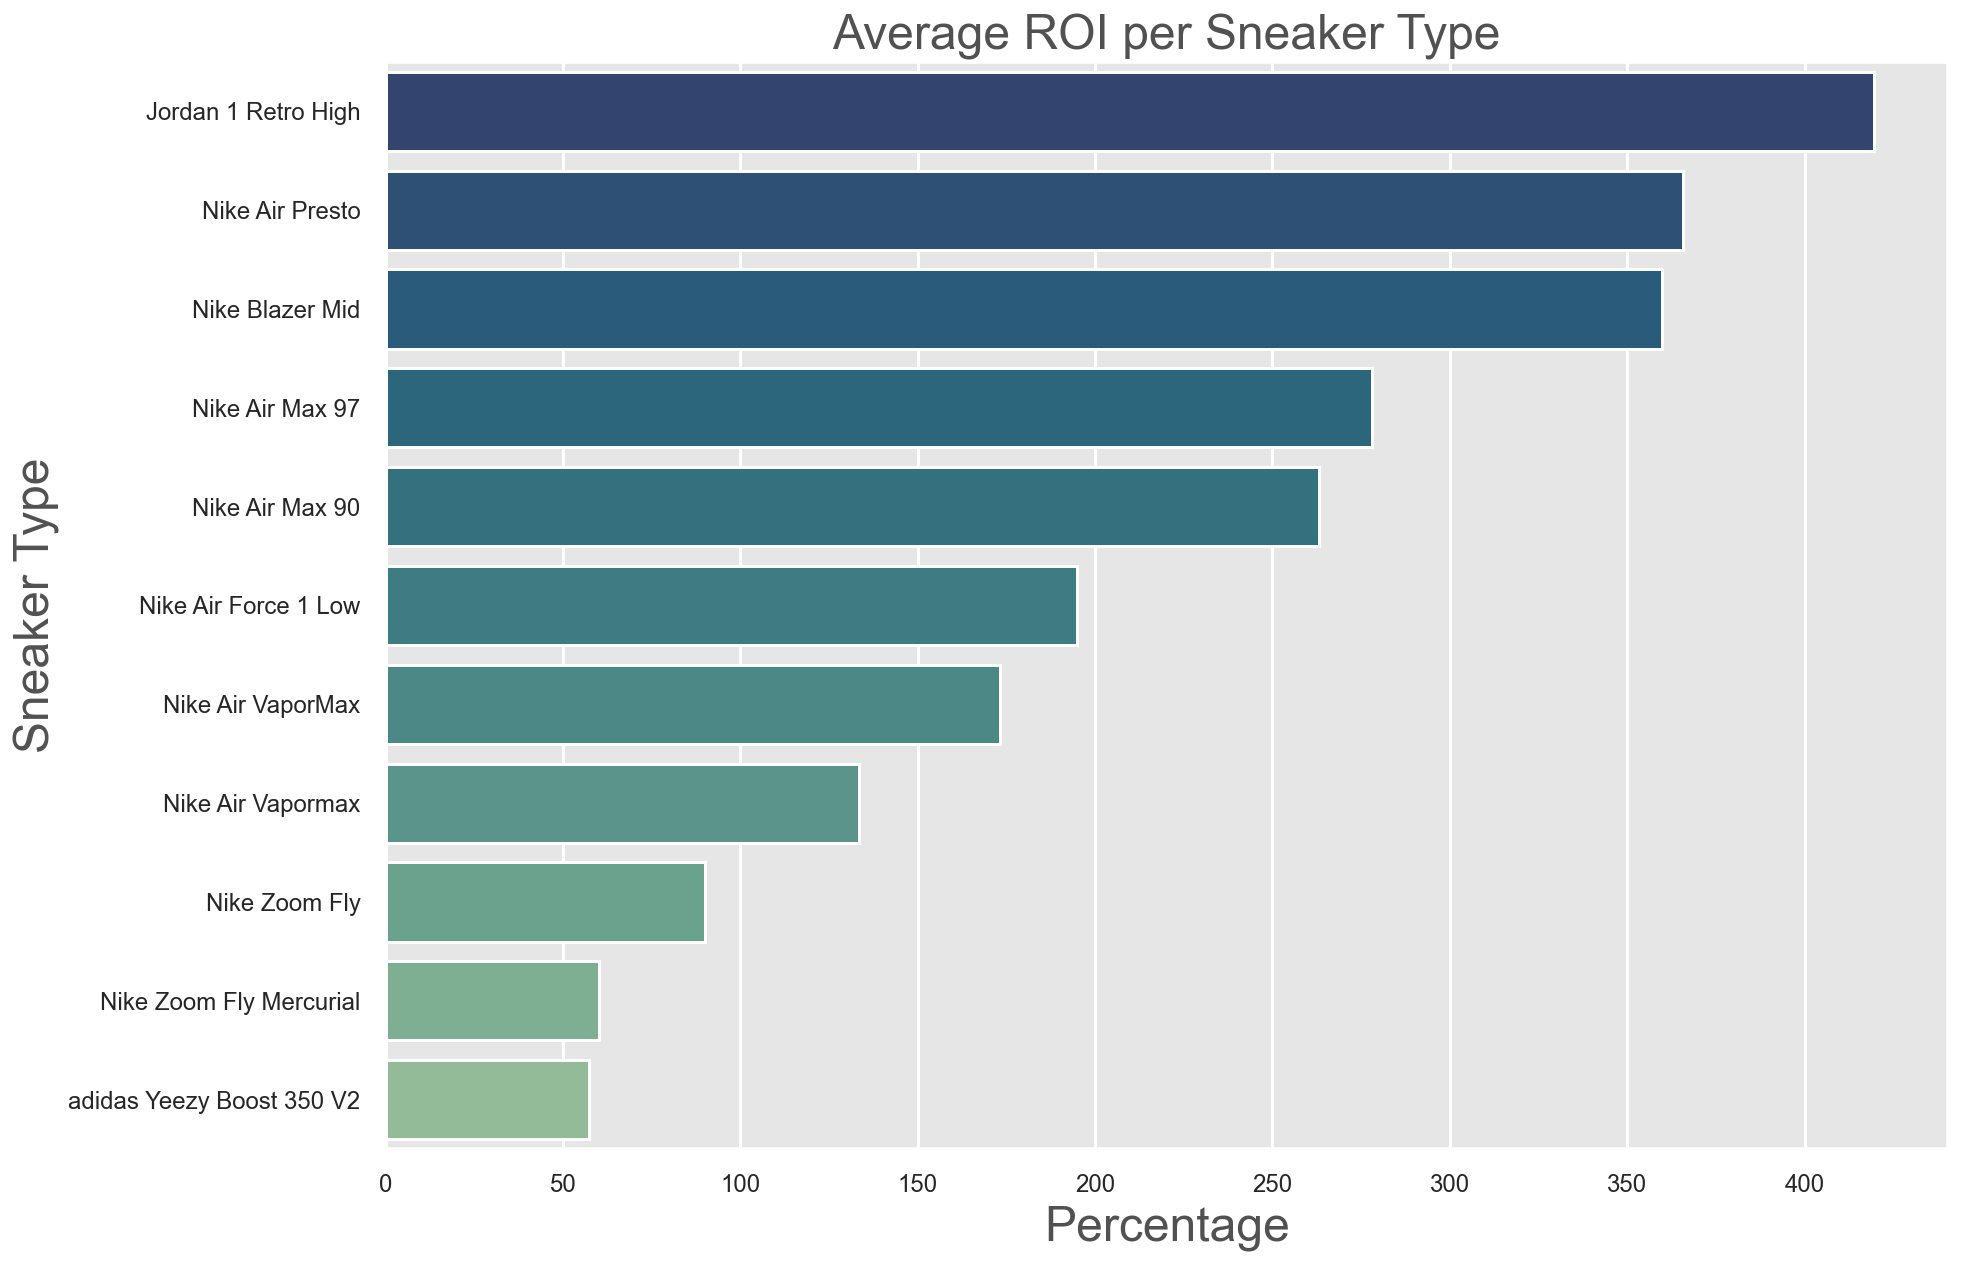

In [362]:
types = []
for i in stockx_df1y['make']:
    if i not in types:
        types.append(i)
    else:
        continue

average_ROI = stockx_df1y[['make', 'ROI']]
avg_ROI = []
for sneaker in types:
    row = average_ROI.loc[average_ROI['make'] == sneaker]
    avg_ROI.append(round(row.mean()[0],2))

average_ROI_df = pd.DataFrame(columns = ['make', 'ROI'])
average_ROI_df['make'] = pd.Series(types)
average_ROI_df['ROI'] = pd.Series(avg_ROI)

fig, ax = plt.subplots(figsize=(14,10))

ROI_plot = average_ROI_df.sort_values(by='ROI', ascending = False)
ax = sns.barplot(x='ROI', y='make', data=ROI_plot, palette = 'crest_r')
    
plt.title('Average ROI per Sneaker Type', fontsize = 24, alpha=0.8)
plt.xlabel('Percentage', fontsize = 24, alpha=0.8)
plt.ylabel('Sneaker Type', fontsize = 24, alpha=0.8)
plt.tick_params(labelsize=14)
ax.tick_params(axis = 'x', labelsize=12)
ax.tick_params(axis = 'y', labelsize=12)
plt.show()

### Style

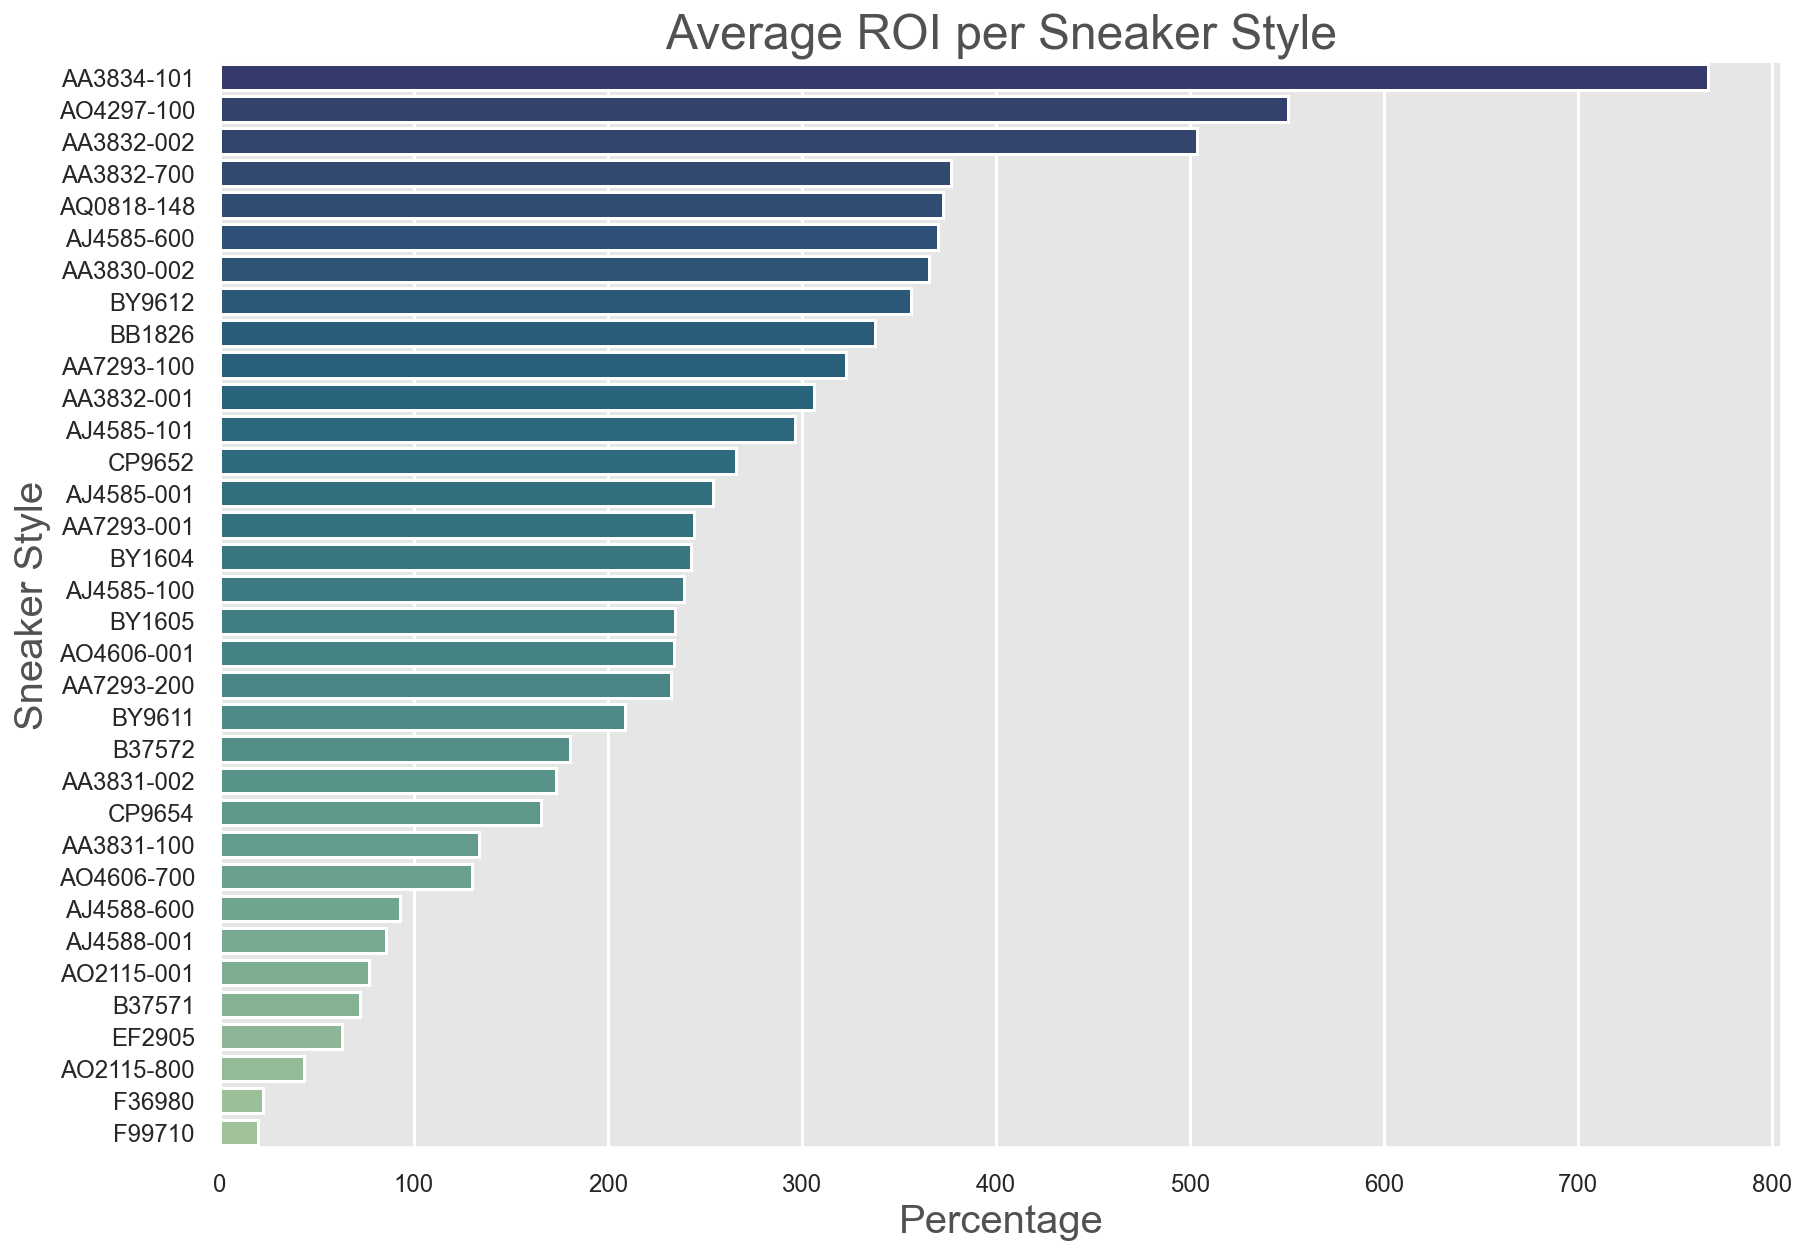

In [363]:
styles = []
for i in stockx_df1y['style_id']:
    if i not in styles:
        styles.append(i)
    else:
        continue

average_ROI = stockx_df1y[['style_id', 'ROI']]
avg_ROI = []
for sneaker in styles:
    row = average_ROI.loc[average_ROI['style_id'] == sneaker]
    avg_ROI.append(round(row.mean()[0],2))

average_ROI_df = pd.DataFrame(columns = ['style_id', 'ROI'])
average_ROI_df['style_id'] = pd.Series(styles)
average_ROI_df['ROI'] = pd.Series(avg_ROI)

fig, ax = plt.subplots(figsize=(14,10))

ROI_plot = average_ROI_df.sort_values(by='ROI', ascending = False)
ax = sns.barplot(x='ROI', y='style_id', data=ROI_plot, palette = 'crest_r')

plt.title('Average ROI per Sneaker Style', fontsize=24, alpha =0.8)
plt.xlabel('Percentage', fontsize = 20, alpha = 0.8)
plt.ylabel('Sneaker Style', fontsize = 20, alpha = 0.8)
plt.tick_params(labelsize=14)
ax.tick_params(axis = 'x', labelsize=12)
ax.tick_params(axis = 'y', labelsize=12)
plt.show()

### Day Since Release

In [364]:
def colors_from_values(values, palette_name):
    normalized = (values - min(values)) / (max(values) - min(values))
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

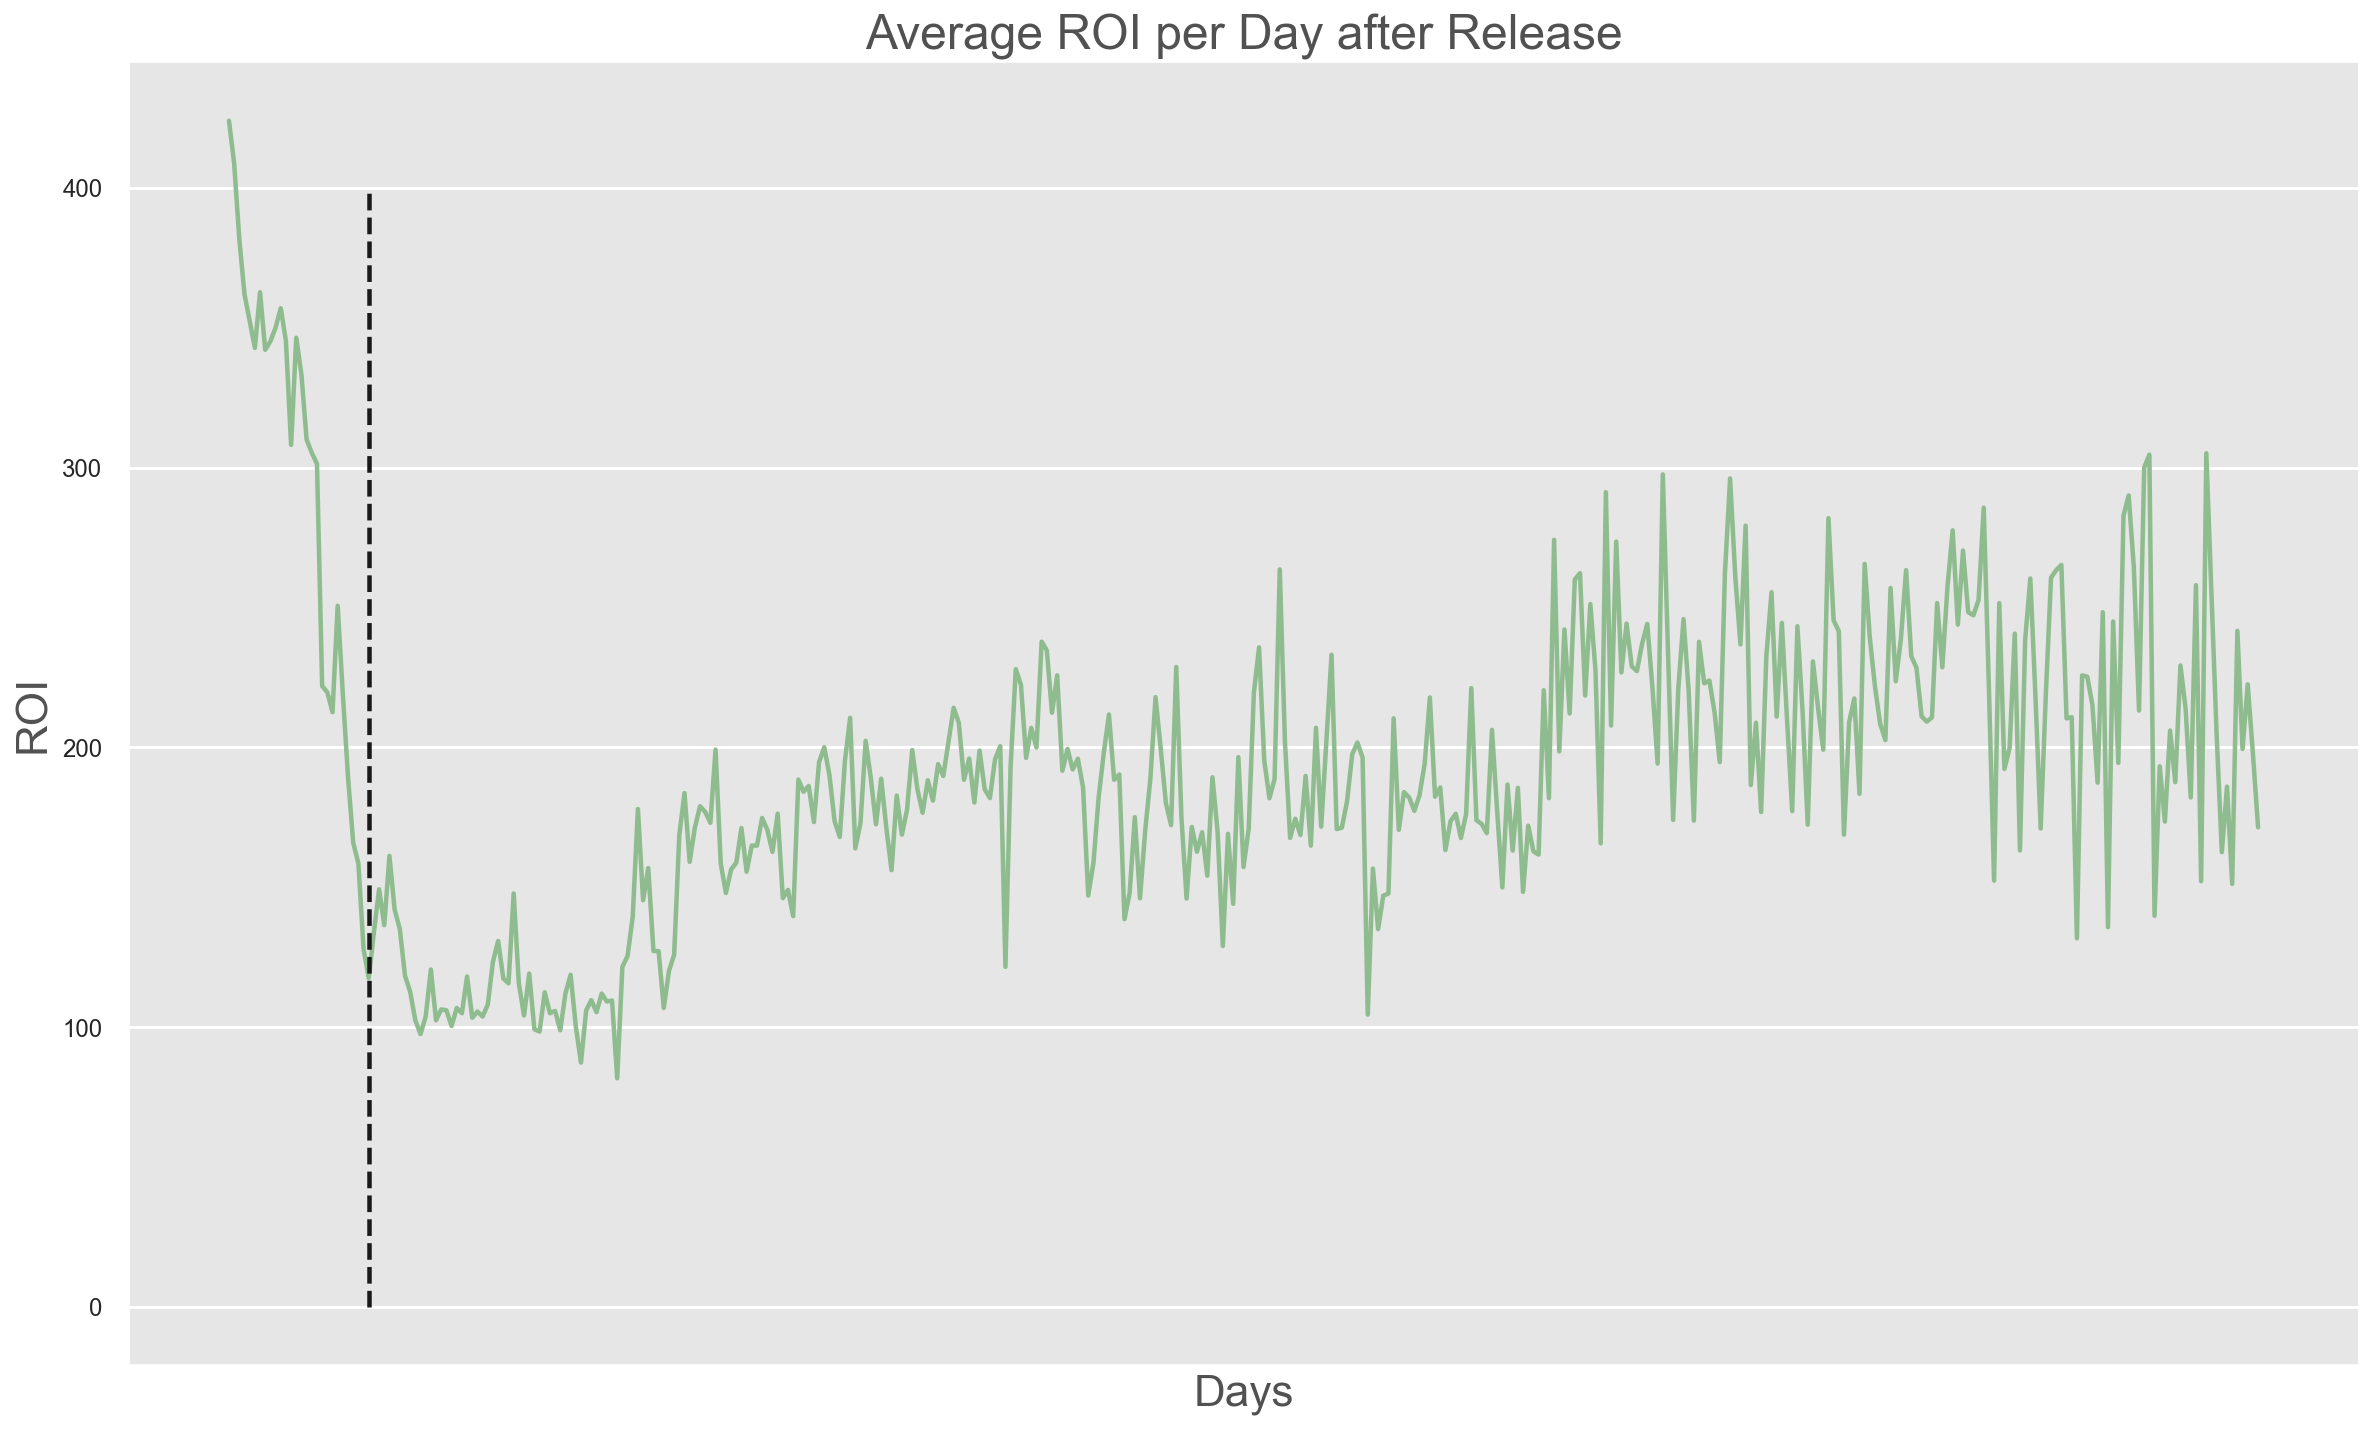

In [368]:
grouped_diff = stockx_df1y.groupby('day_since_release').agg({'order_date':'count', 'ROI': 'mean'})
grouped_diff = grouped_diff[2:].reset_index()
grouped_diff.columns = ['Day', 'Count', 'ROI']

plt.figure(figsize = (20,12))
ax = sns.lineplot(data = grouped_diff, x='Day', y = 'ROI', color ='darkseagreen')

ax.set_xlabel("Days", fontsize=22, alpha=0.8)
ax.set_ylabel("ROI", fontsize=22, alpha=0.8)
ax.set_title("Average ROI per Day after Release", fontsize=24, alpha=0.8)
ax.set(xticks = [])
plt.tick_params(labelsize=14)
ax.tick_params(axis = 'x', labelsize=12)
ax.tick_params(axis = 'y', labelsize=12)

plt.plot([0,0], [0,400], 'k--', )
plt.show();

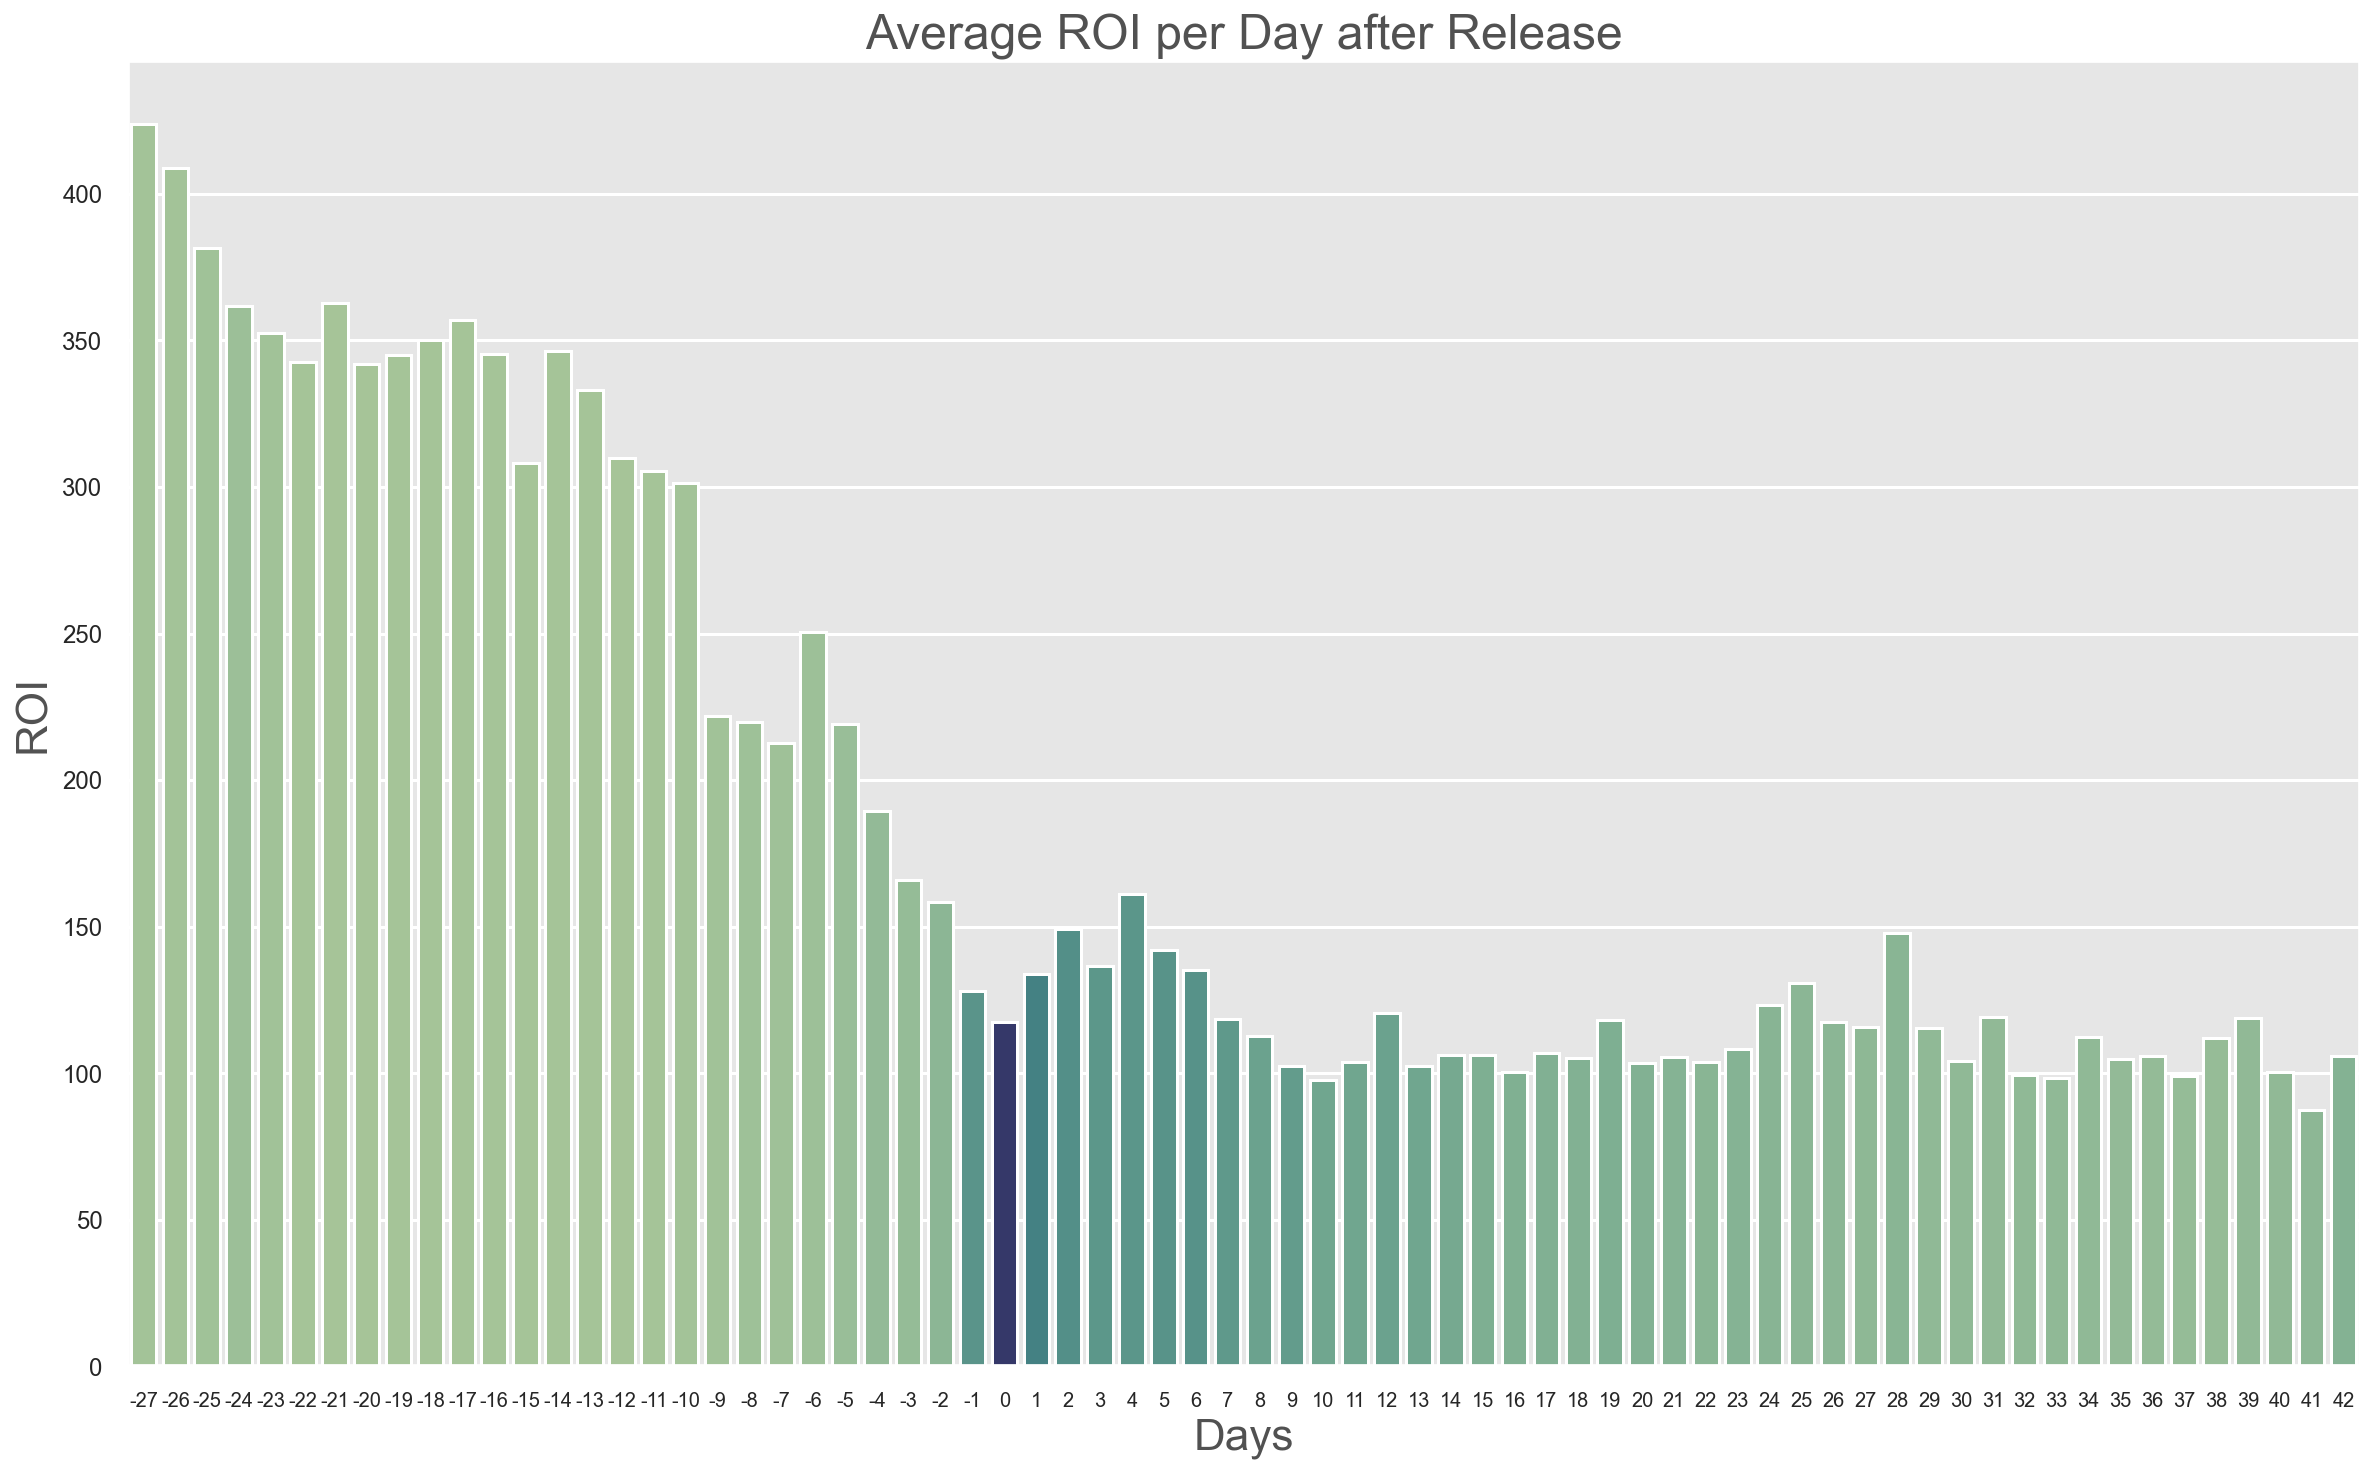

In [369]:
grouped_diff_smaller = grouped_diff[grouped_diff['Day']<43]

plt.figure(figsize = (20,12))
ax = sns.barplot(data = grouped_diff_smaller, x='Day', y = 'ROI', palette = colors_from_values(grouped_diff.Count, 'crest'))
ax.set_xlabel("Days", fontsize=22, alpha=0.8)
ax.set_ylabel("ROI", fontsize=22, alpha=0.8)
ax.set_title("Average ROI per Day after Release", fontsize=24, alpha=0.8)
plt.tick_params(labelsize=14)
ax.tick_params(axis = 'x', labelsize=10)
ax.tick_params(axis = 'y', labelsize=12)
plt.show()

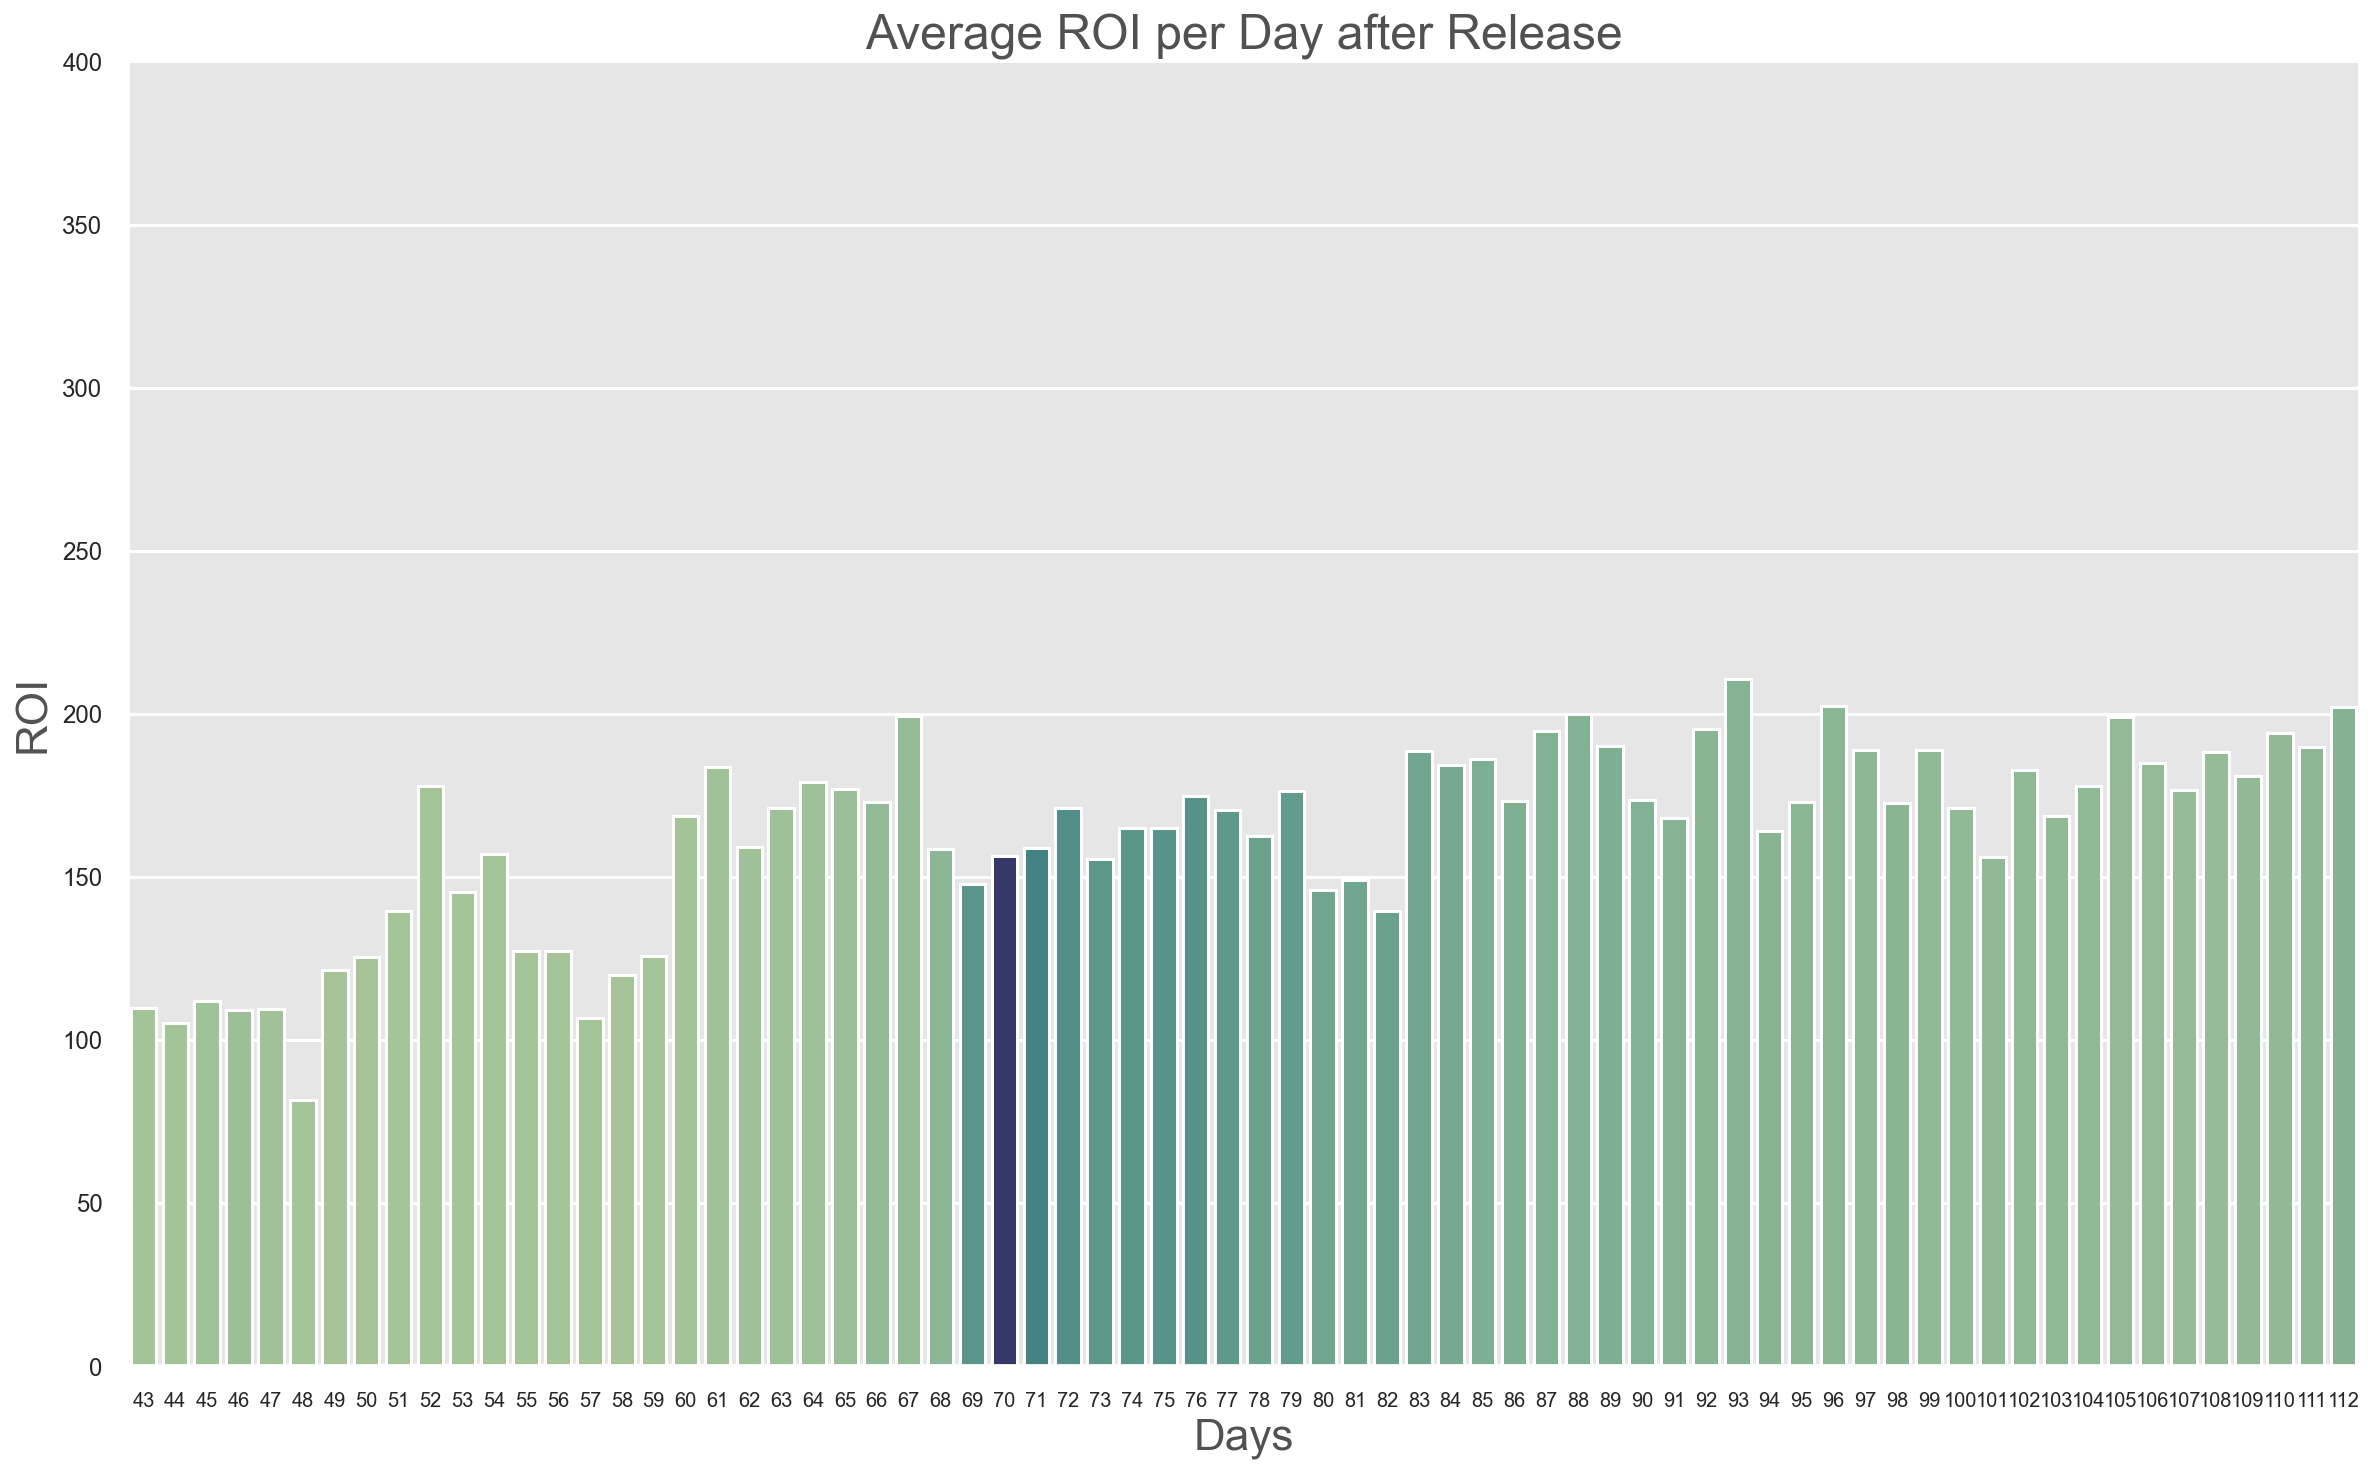

In [370]:
grouped_diff_larger = grouped_diff[(grouped_diff['Day']>42) & (grouped_diff['Day']<113)]

plt.figure(figsize = (20,12))
ax = sns.barplot(data = grouped_diff_larger, x='Day', y = 'ROI', palette = colors_from_values(grouped_diff.Count, 'crest'))
ax.set_xlabel("Days", fontsize=22, alpha=0.8)
ax.set_ylabel("ROI", fontsize=22, alpha=0.8)
ax.set_title("Average ROI per Day after Release", fontsize=24, alpha=0.8)
plt.tick_params(labelsize=14)
ax.tick_params(axis = 'x', labelsize=10)
ax.tick_params(axis = 'y', labelsize=12)
ax.set_ylim((0, 400))
plt.show()

### Day

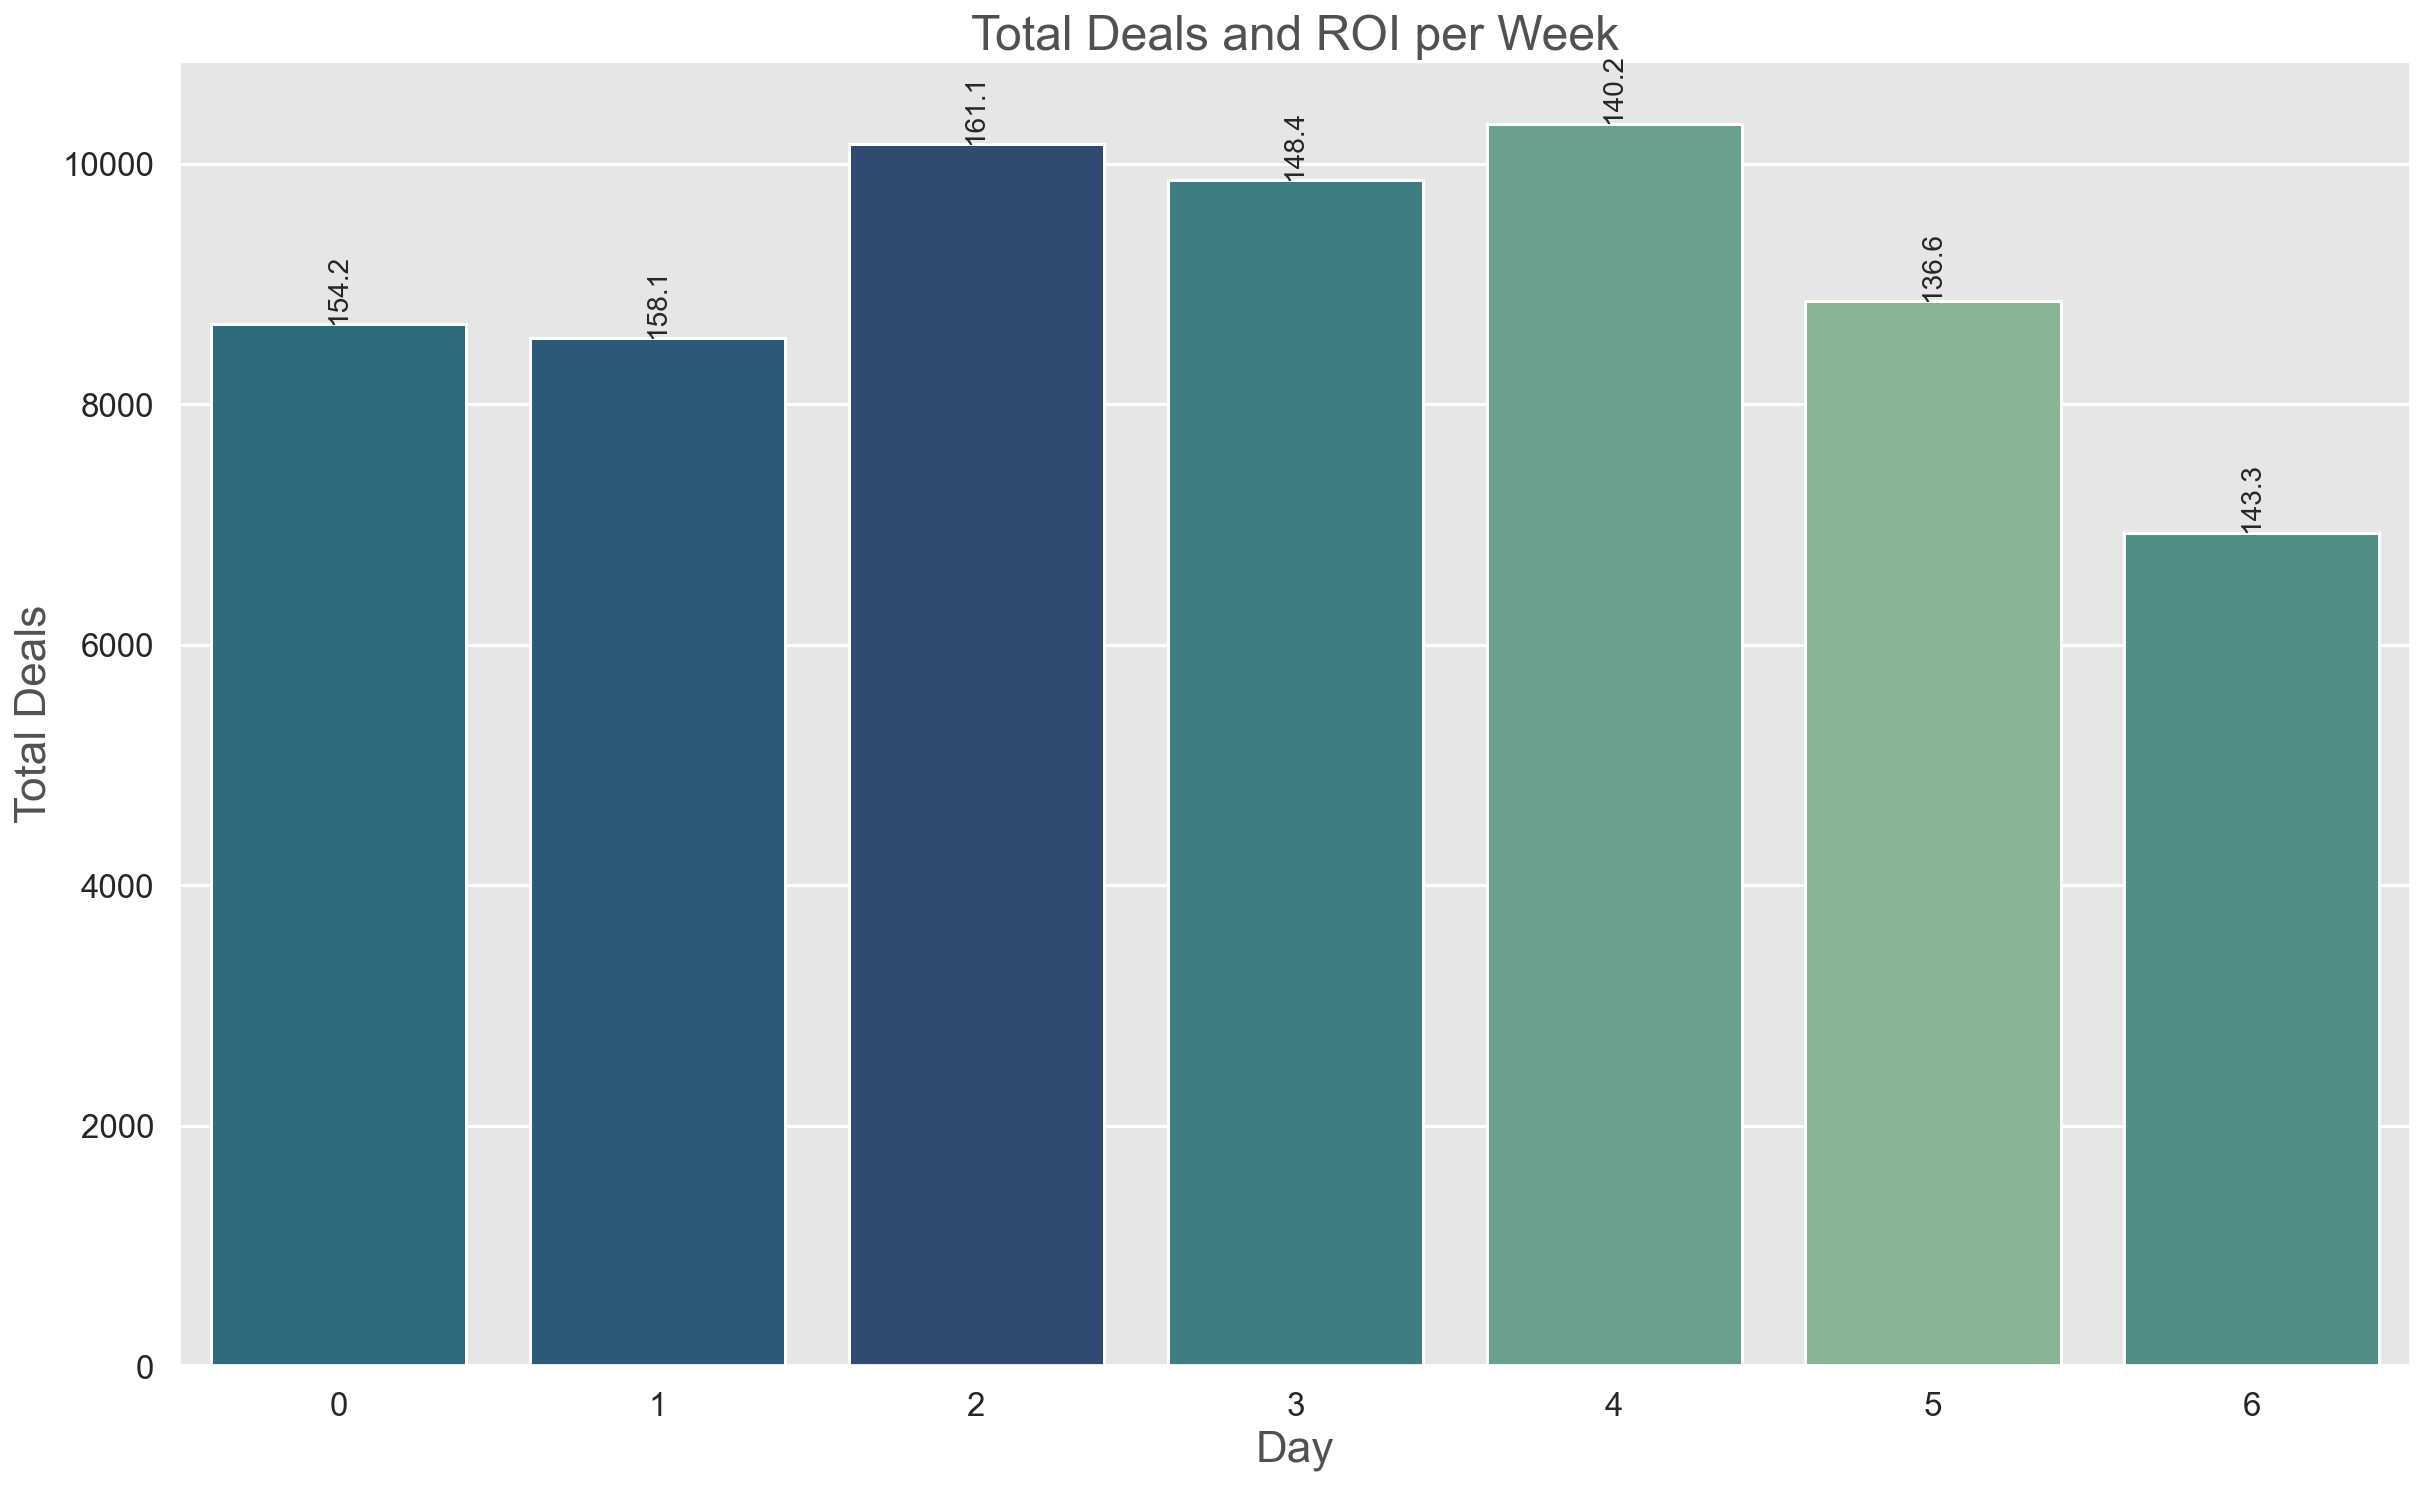

In [376]:
grouped_day = stockx_df1y.groupby('day').agg({'order_date':'count', 'ROI': 'mean'})
grouped_day = grouped_day.reset_index()
grouped_day.columns = ['Day', 'Count', 'ROI']

plt.figure(figsize = (20,12))
ax = sns.barplot(data = grouped_day, x='Day', y = 'Count', palette = colors_from_values(grouped_day.ROI, 'crest'))

ax.set_xlabel("Day", fontsize=22, alpha=0.8)
ax.set_ylabel("Total Deals", fontsize=22, alpha=0.8)
ax.set_title("Total Deals and ROI per Week", fontsize=24, alpha =0.8)

for rect, label in zip(ax.patches, list(round(grouped_day['ROI'], 1))):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', size = 14, rotation = 90)
plt.show();

### Week

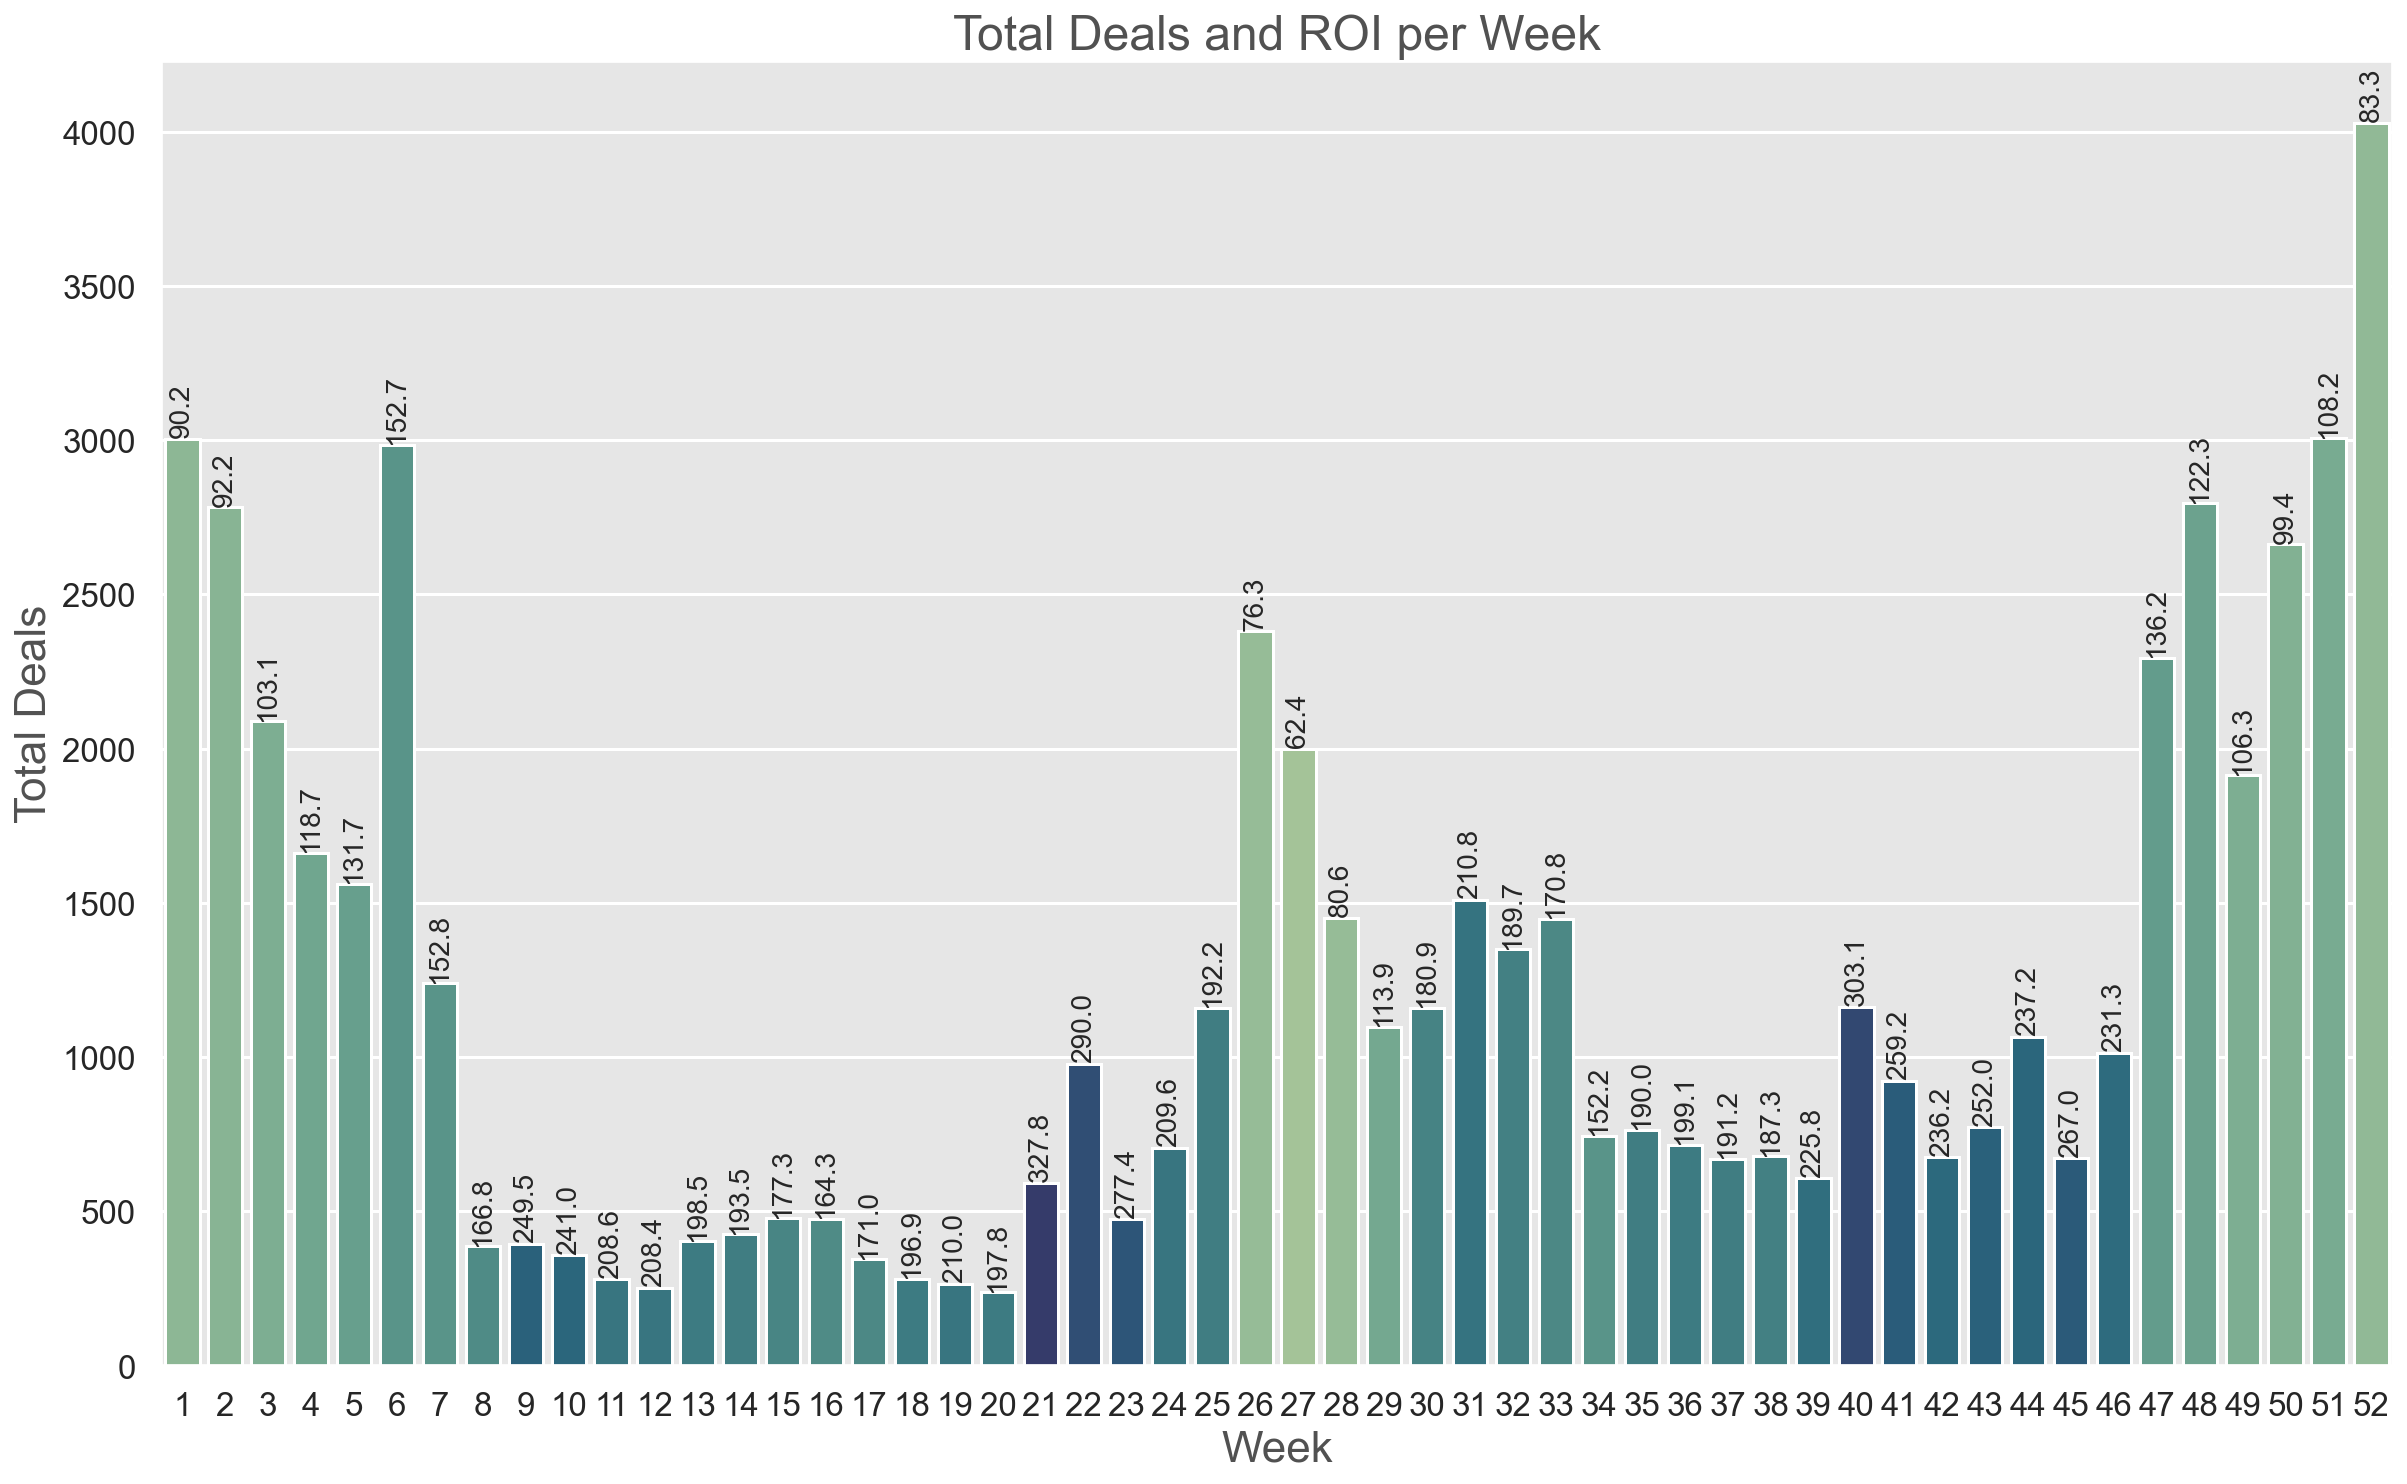

In [375]:
grouped_week = stockx_df1y.groupby('week').agg({'order_date':'count', 'ROI': 'mean'})
grouped_week = grouped_week.reset_index()
grouped_week.columns = ['Week', 'Count', 'ROI']

plt.figure(figsize = (20,12))
ax = sns.barplot(data = grouped_week, x='Week', y = 'Count', palette = colors_from_values(grouped_week.ROI, 'crest'))

ax.set_xlabel("Week", fontsize=22, alpha=0.8)
ax.set_ylabel("Total Deals", fontsize=22, alpha=0.8)
ax.set_title("Total Deals and ROI per Week", fontsize=24, alpha =0.8)

for rect, label in zip(ax.patches, list(round(grouped_week['ROI'], 1))):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', size = 14, rotation = 90)
plt.show();

### Month

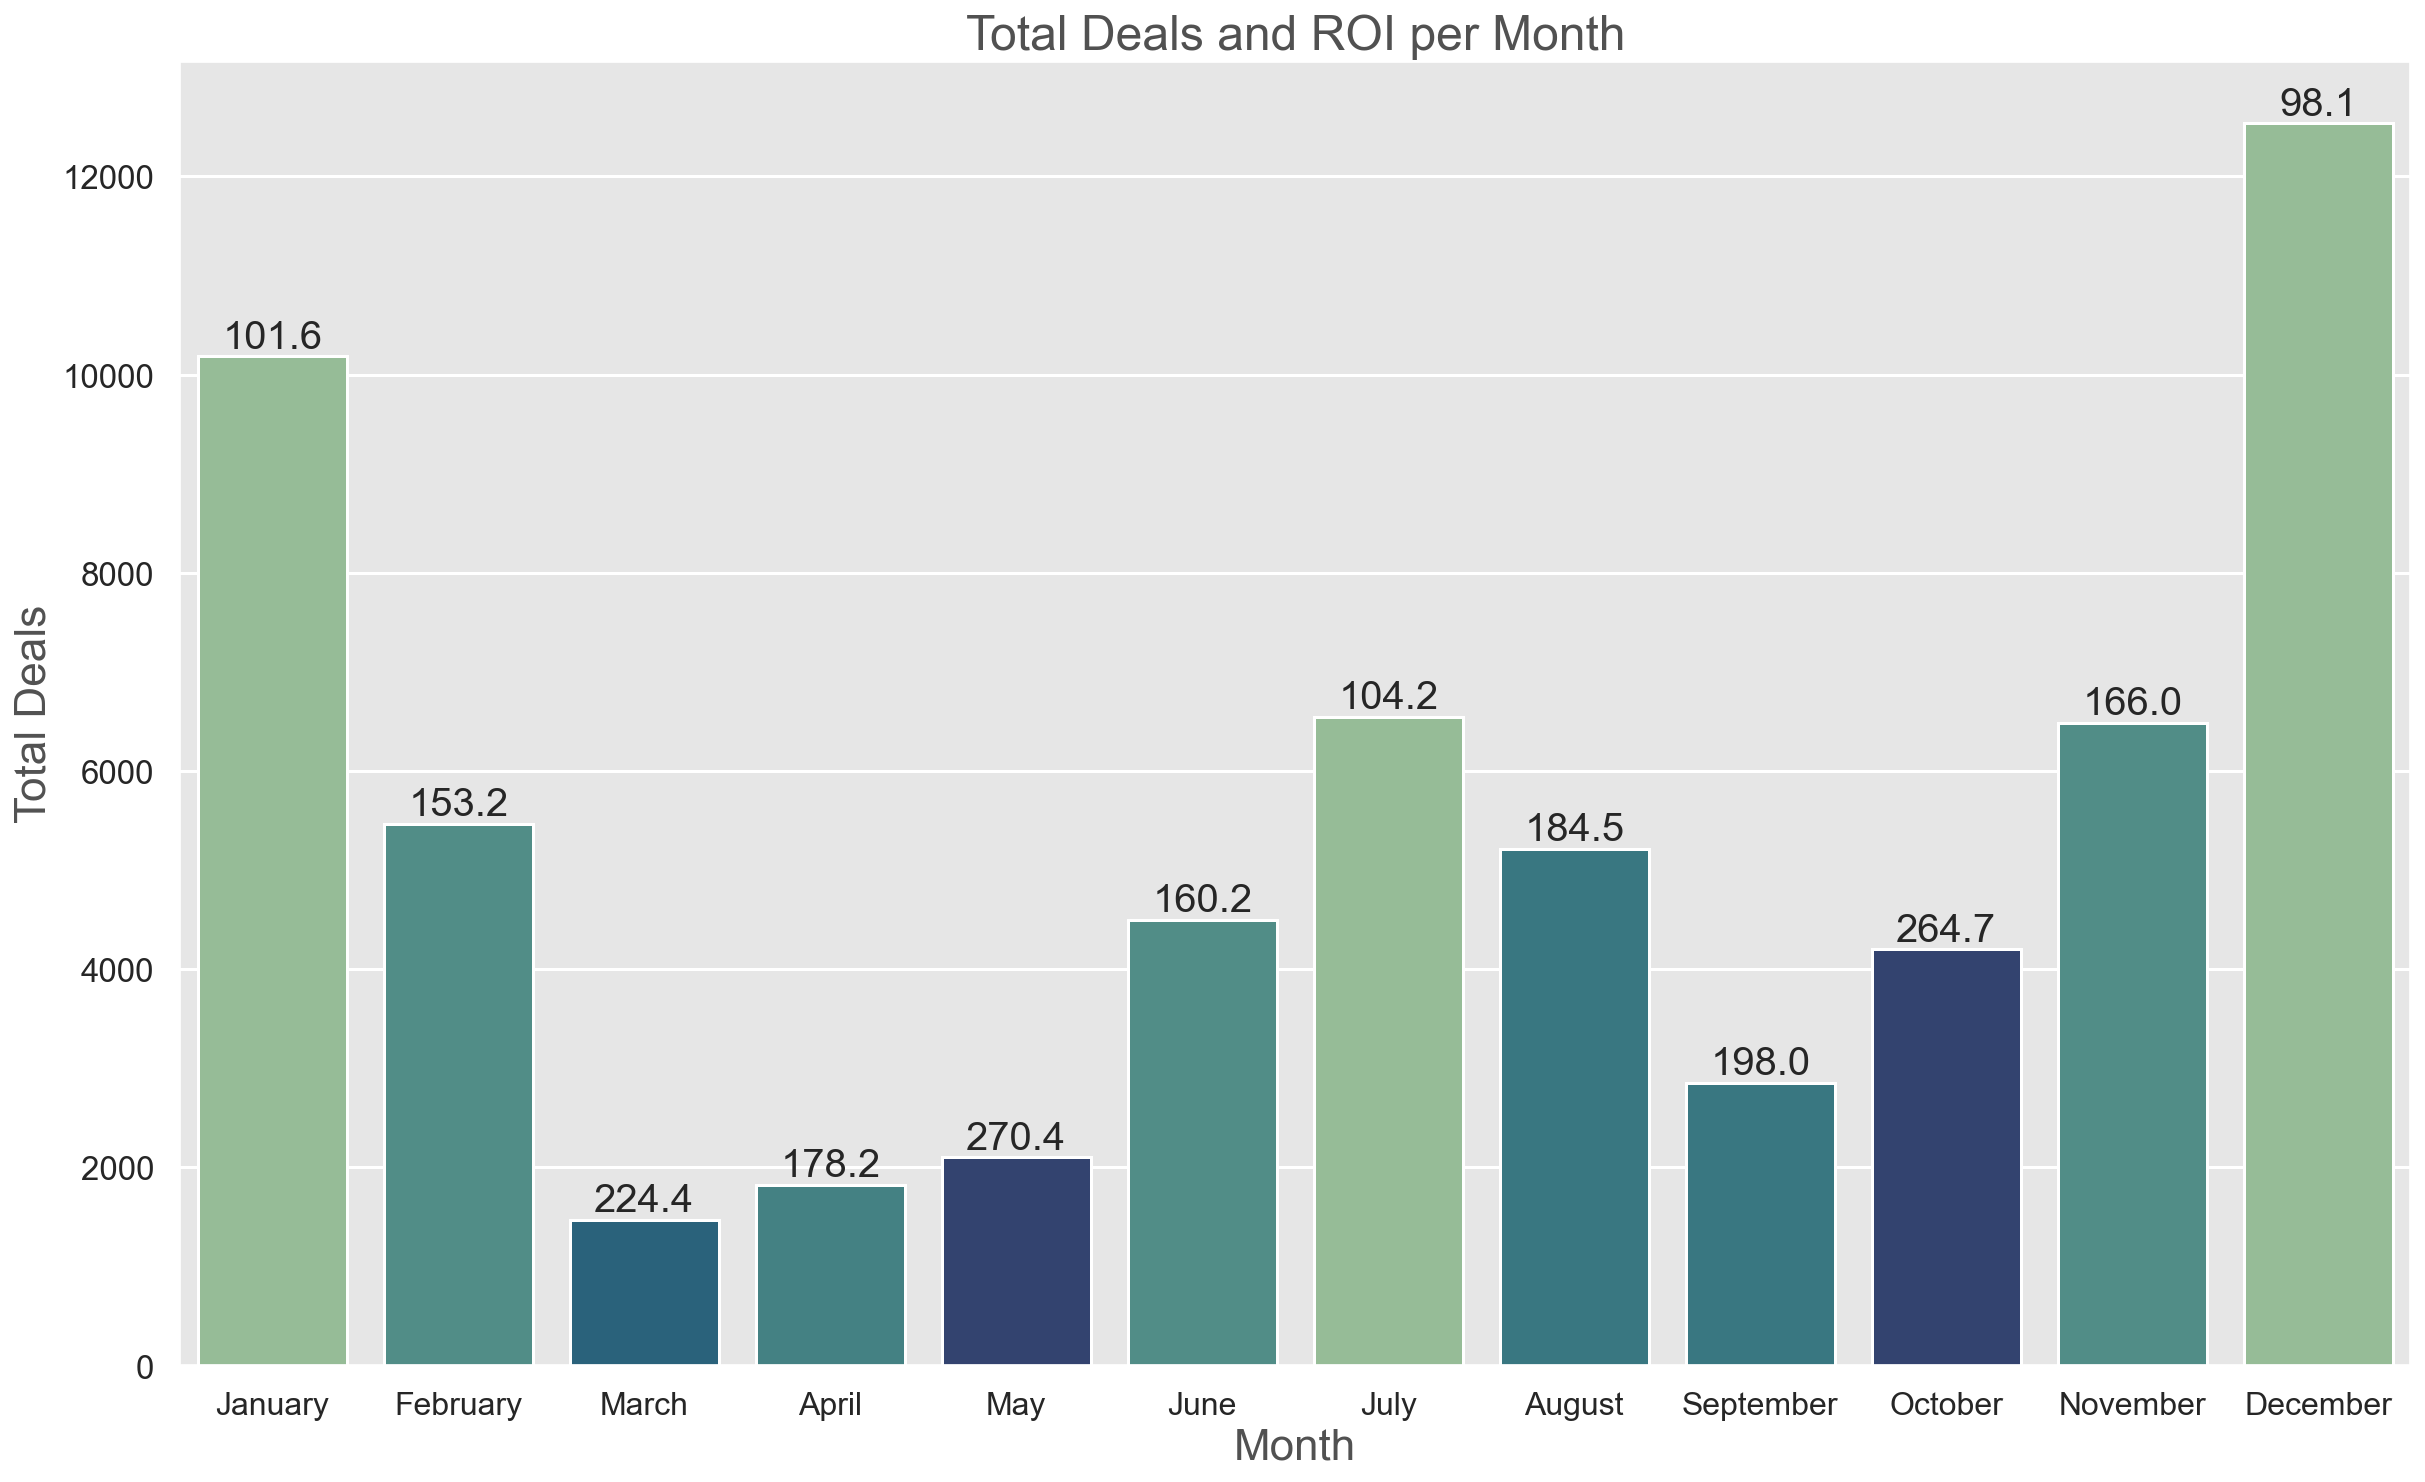

In [374]:
grouped_month = stockx_df1y.groupby('month').agg({'order_date':'count', 'ROI': 'mean'})
grouped_month = grouped_month.reset_index()
grouped_month.columns = ['Month', 'Count', 'ROI']

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
         'September', 'October', 'November', 'December']

plt.figure(figsize = (20,12))
ax = sns.barplot(data = grouped_month, x='Month', y = 'Count', palette = colors_from_values(grouped_month.ROI, 'crest'))
   
ax.set_xlabel("Month", fontsize=22, alpha=0.8)
ax.set_ylabel("Total Deals", fontsize=22, alpha=0.8)
ax.set_title("Total Deals and ROI per Month", fontsize=24, alpha=0.8)
ax.set_xticklabels(months, fontsize=16)

for rect, label in zip(ax.patches, list(round(grouped_month['ROI'], 1))):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', size =20)
plt.show();

### Size

We set 700 observations as the threshold for the shoe size to be included into the modelling. This means that the sizes 12.5, 15.0, 13.5, 16.0, 14.5, 3.5, 17.0 are under representative in the dataset and therefore we can not make useful predictions on them.

In [ ]:
stockx_df1y['shoe_size'].value_counts(ascending = False)

stockx_df1y = stockx_df1y.drop(stockx_df1y[(stockx_df1y.shoe_size == 3.5) |
                                           (stockx_df1y.shoe_size == 12.5) |
                                           (stockx_df1y.shoe_size == 13.5) |
                                           (stockx_df1y.shoe_size == 14.5) |
                                           (stockx_df1y.shoe_size == 15.0) |
                                           (stockx_df1y.shoe_size == 16.0) |
                                           (stockx_df1y.shoe_size == 17.0)].index)

In [ ]:
shoe_size_df = stockx_df1y['shoe_size'].value_counts().sort_index().reset_index()
shoe_size_df = shoe_size_df.rename(columns = {'index': 'shoe_size', 'shoe_size': 'count'})

fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x='shoe_size', y='count', data=shoe_size_df, palette = 'crest')
plt.title('Number of Different Sneaker Sizes')
plt.xlabel('Size')
plt.ylabel('Number of Sneakers')
plt.tick_params(labelsize=14)
plt.show()

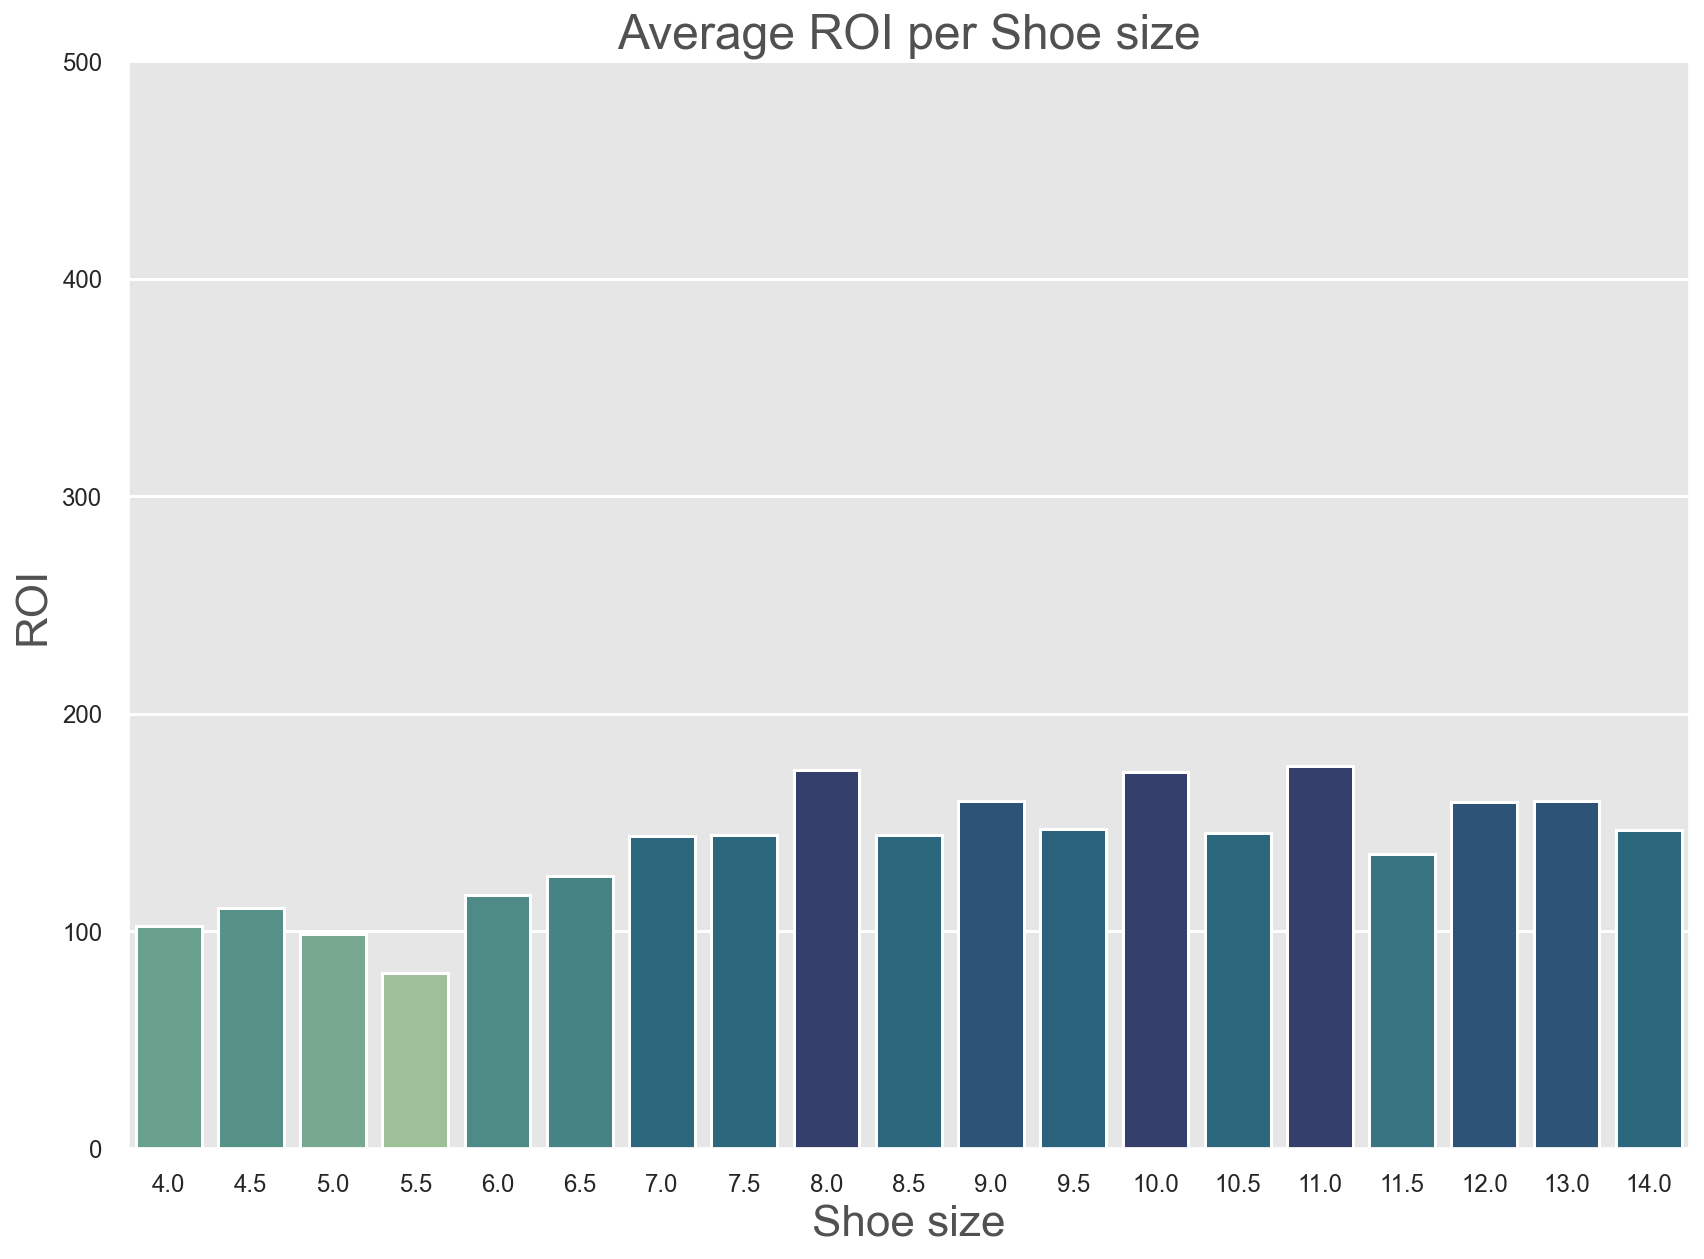

In [377]:
grouped_size = stockx_df1y.groupby('shoe_size').agg({'order_date':'count', 'ROI': 'mean'})
grouped_size = grouped_size.reset_index()
grouped_size.columns = ['Size', 'Count', 'ROI']

plt.figure(figsize = (14,10))
ax = sns.barplot(x='Size', y="ROI", data = grouped_size, palette = colors_from_values(grouped_size.ROI, 'crest'))
plt.xlabel('Shoe size', fontsize = 22, alpha=0.8)
plt.ylabel('ROI', fontsize = 22, alpha=0.8)
plt.title('Average ROI per Shoe size', fontsize = 24, alpha=0.8)
plt.tick_params(labelsize=14)
ax.set_ylim((0, 500))
ax.tick_params(axis = 'x', labelsize=12)
ax.tick_params(axis = 'y', labelsize=12)
plt.show();

# Model The Data

In [401]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.linear_model import Lasso, LassoCV
from sklearn.neural_network import MLPRegressor
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor

For the modelling part, to make use of the variable 'day_since_release', I shifted the values with +29, so that -30 is day 0 and day 30 is the release date. Now it's possible to see the influence of when the sneaker is resold. 

In [415]:
stockx_df1y['day_since_release_2'] = stockx_df1y['day_since_release'].add(29)

## Preparing the data 

In [419]:
target_variable = stockx_df1y['ROI']
categorical_variables = ['brand', 'shoe_size', 'style_id','make', 'day', 'month', 'week']

# Dropping
subset1 = stockx_df1y.drop(columns = ['order_date', 'sneaker_name', 'sale_price', 
                                      'retail_price','release_date','buyer_region',
                                      'within_1years','colorway','day_since_release'])

In [420]:
# Initializing Target- and Predictor variables
y = subset1.pop('ROI')
X = subset1.copy()

# Dummification
X_dum = pd.get_dummies(X, columns = ['brand', 'shoe_size', 'style_id',
                                     'day', 'month', 'week'], drop_first = True)
X_dum = pd.get_dummies(X_dum, columns = ['make'], drop_first = False)
X_dum = X_dum.drop(columns = 'make_Nike Air VaporMax')

# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.2, random_state = 34)

## Linear-based Models

### Linear Regressor

In [421]:
model_LINEAR = LinearRegression(n_jobs = 2)
model_LINEAR.fit(X_train, y_train)

print("Train score:", model_LINEAR.score(X_train, y_train))
print("Test score:", model_LINEAR.score(X_test, y_test))
print("Cross-validated score:", cross_val_score(model_LINEAR, X_train, y_train, cv = 5).mean())

os.system('say “Hey David, your program has finished!“')

Train score: 0.8287325437704725
Test score: 0.8116877776299763
Cross-validated score: 0.8276084202354431


0

### Lasso Regressor

In [422]:
model_LASSO = Lasso(random_state = 34, max_iter = 50000)
params_LASSO = {'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 1]}

gs_LASSO = GridSearchCV(model_LASSO, params_LASSO, cv = 5, 
                        verbose = 1 , n_jobs = 2)
gs_LASSO.fit(X_train, y_train)

print("Best parameters:", gs_LASSO.best_params_)
print()
print("Train score:", gs_LASSO.score(X_train, y_train))
print("Test score:", gs_LASSO.score(X_test, y_test))
print("Cross-validated score:", gs_LASSO.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed: 99.1min finished


Best parameters: {'alpha': 0.001}

Train score: 0.82872851739545
Test score: 0.8116907627837964
Cross-validated score: 0.8276288153713948


In [441]:
best_LASSO = Lasso(alpha=0.001, max_iter = 50000)
best_LASSO.fit(X_train, y_train)

print('Train score:', best_LASSO.score(X_train, y_train))
print('Test score:', best_LASSO.score(X_test, y_test))
print('Cross-validated score:', cross_val_score(best_LASSO, X_train, y_train, cv=5).mean())

Train score: 0.82872851739545
Test score: 0.8116907627837964
Cross-validated score: 0.8276288153713948


In [446]:
# Evaluation
pred_train_LASSO = best_LASSO.predict(X_train) 
pred_test_LASSO = best_LASSO.predict(X_test)

mse_LASSO = mean_squared_error(y_test, pred_test_LASSO)
print('R2 Score: %.4f' % r2_score(y_test, pred_test_LASSO))
print('MSE: %.2f' % mse_LASSO)
print('RMSE: %.2f' % (mse_LASSO**(1/2.0)))

R2 Score: 0.8117
MSE: 5142.35
RMSE: 71.71


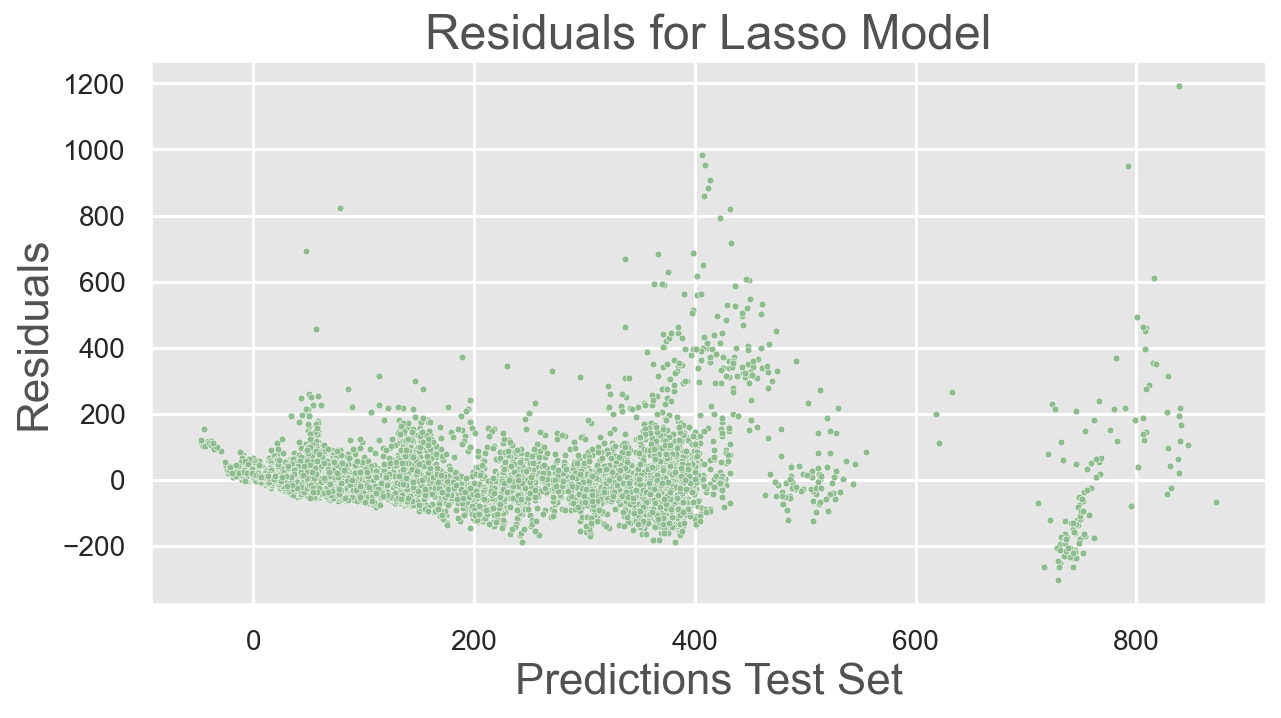

In [447]:
residuals_LASSO = y_test - pred_test_LASSO
pred_residuals = pd.DataFrame({'pred': pred_test_LASSO, 'resid': residuals_LASSO}, columns=['pred', 'resid'])

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.axes_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize = (10,5))
pred_residuals = pd.DataFrame({'pred': pred_test_LASSO, 'resid': residuals_LASSO}, columns=['pred', 'resid'])
sns.scatterplot(x = 'pred', y='resid', data = pred_residuals, color ='darkseagreen', s=12)
plt.xlabel('Predictions Test Set',fontsize = 22, alpha =0.8)
plt.ylabel('Residuals',fontsize = 22, alpha =0.8)
plt.title('Residuals for Lasso Model', fontsize = 24, alpha =0.8)
plt.tick_params(labelsize=14)
ax.tick_params(axis = 'x', labelsize=14)
ax.tick_params(axis = 'y', labelsize=12)
plt.show()

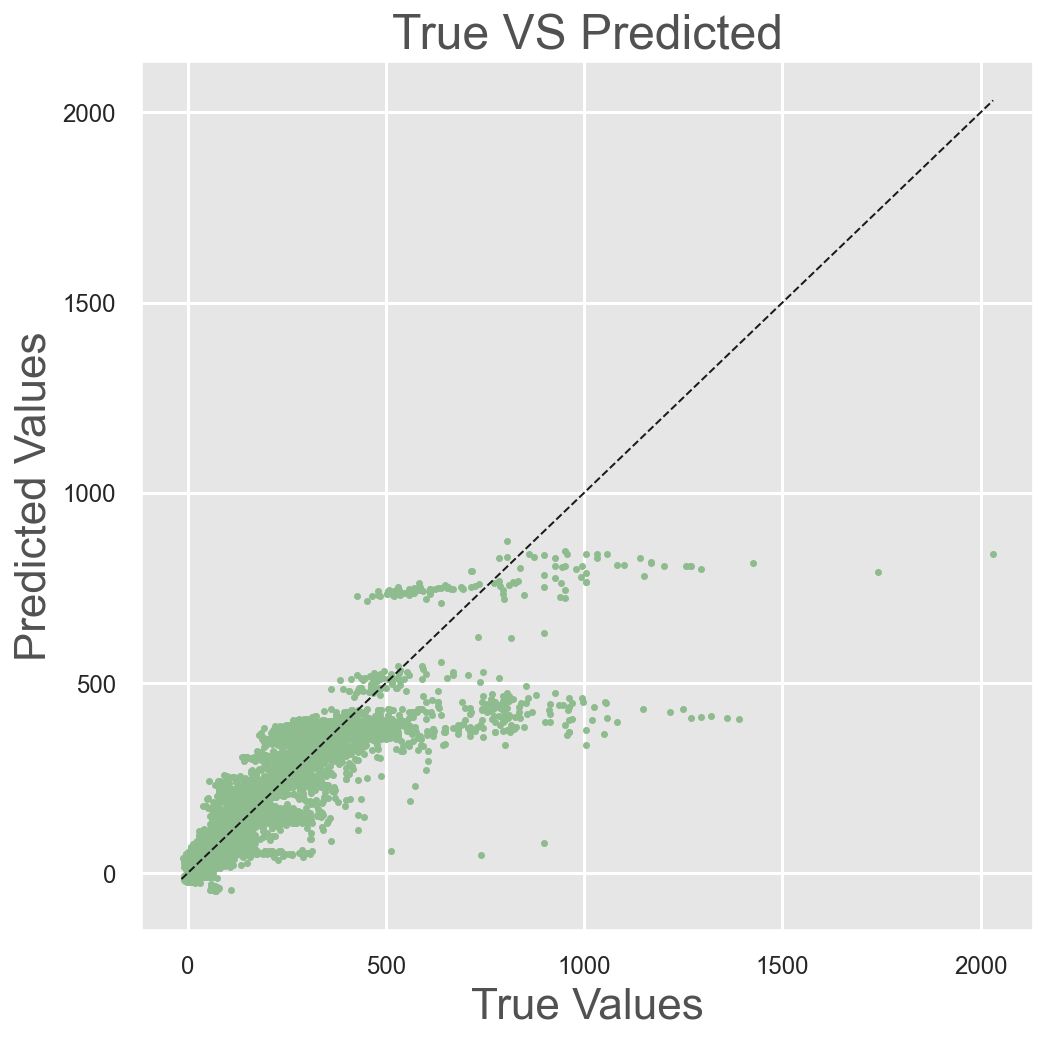

In [448]:
# Visualization
true_vs_predict = pd.DataFrame({'True Values': y_test, 'Predicted Values': pred_test_LASSO})

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_test, pred_test_LASSO, s=4, color ='darkseagreen')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('True Values', fontsize=22, alpha=0.8)
ax.set_ylabel('Predicted Values', fontsize=22, alpha=0.8)
ax.set_title("True VS Predicted", fontsize=24, alpha=0.8)
plt.tick_params(labelsize=14)
ax.tick_params(axis = 'x', labelsize=12)
ax.tick_params(axis = 'y', labelsize=12)
plt.show()

### Linear Support Vector Machine Regressor

In [ ]:
model_LSVM = LinearSVR(random_state = 34, tol = 0.01, max_iter = 10000)
params_LSVM = {'C': np.linspace(0,1,20)}

gs_LSVM = GridSearchCV(model_LSVM, params_LSVM, cv = 5, 
                       verbose = 1, n_jobs = 2)

gs_LSVM.fit(X_train, y_train)

print("Best parameters:", gs_LSVM.best_params_)
print()
print("Train score:", gs_LSVM.score(X_train, y_train))
print("Test score:", gs_LSVM.score(X_test, y_test))
print("Cross-validated score:", gs_LSVM.best_score_)

os.system('say “Hey David, your program has finished!“')
joblib.dump(gs_LSVM, 'gs_LSVM.jlib')

## Tree-based Models

### Random Forest Regressor

Random Forest Regressor is the best model with a cross-validated R2 score of 97,4% and the lowest MSE and RMSE. I could still perform a gridsearch to increase this value, but I still need to run in.

In [423]:
model_RFR = RandomForestRegressor(random_state = 34, n_jobs = -2)
model_RFR.fit(X_train, y_train)

print('Training Score:', model_RFR.score(X_train, y_train)) 
print('Test Score:', model_RFR.score(X_test, y_test))
print('Cross validation score:', cross_val_score(model_RFR, X_train, y_train, cv=5).mean())

os.system('say “Hey David, your program has finished!“')
joblib.dump(model_RFR, 'model_RFR.jlib')

Training Score: 0.9958460754049889
Test Score: 0.9673708979146256
Cross validation score: 0.9744599622419138


['model_RFR.jlib']

In [ ]:
# Still need to run
model_RFR = RandomForestRegressor(random_state = 34)
param_grid_RFR = {'n_estimators' : [100, 300, 500, 800, 1200],
                  'max_depth':[5,8,15,25,30],
                  'min_samples_split' : [2,5,10,15,100],
                  'min_samples_leaf':[1,2,5,10]}

gs_RFR = GridSearchCV(model_RFR, param_grid_RFR, cv=3, n_jobs=-1, verbose=1)
gs_RFR.fit(X_train, y_train)

print("Best parameters:", gs_RFR.best_params_)
print()
print("Train score:", gs_RFR.score(X_train, y_train))
print("Test score:", gs_RFR.score(X_test, y_test))
print("Cross-validated score:", gs_RFR.best_score_)
os.system('say “Hey David, your program has finished!“')

In [435]:
# Evaluation
model_RFR = joblib.load('model_RFR.jlib')

pred_train_RFR = model_RFR.predict(X_train)
pred_test_RFR = model_RFR.predict(X_test)

mse_RFR = mean_squared_error(y_test, pred_test_RFR)
print('R2 Score: %.4f' % r2_score(y_test, pred_test_RFR))
print('MSE: %.2f' % mse_RFR)
print('RMSE: %.2f' % (mse_RFR**(1/2.0)))

R2 Score: 0.9674
MSE: 891.04
RMSE: 29.85


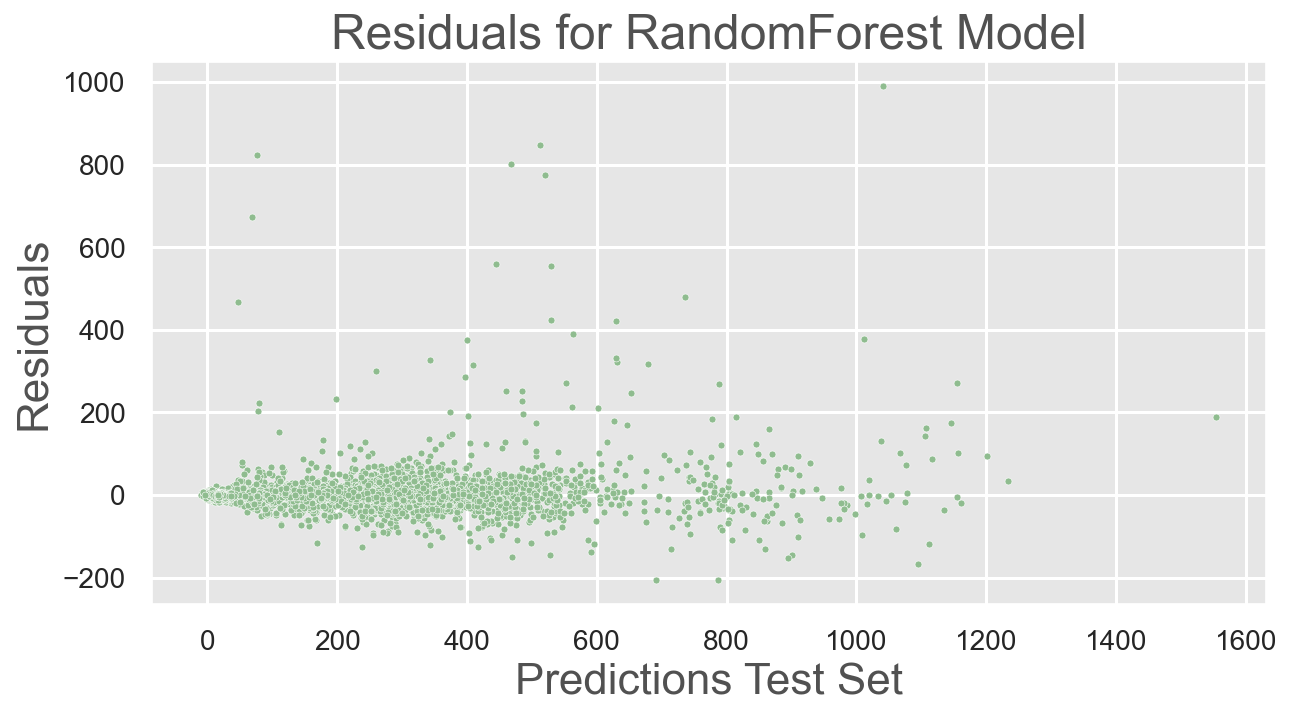

In [439]:
residuals_RFR = y_test - pred_test_RFR
pred_residuals_RFR = pd.DataFrame({'pred': pred_test_RFR, 'resid': residuals_RFR}, columns=['pred', 'resid'])

plt.figure(figsize = (10,5))
pred_residuals = pd.DataFrame({'pred': pred_test_RFR, 'resid': residuals_RFR}, columns=['pred', 'resid'])
sns.scatterplot(x = 'pred', y='resid', data = pred_residuals_RFR, color ='darkseagreen', s=12)
plt.xlabel('Predictions Test Set',fontsize = 22, alpha =0.8)
plt.ylabel('Residuals',fontsize = 22, alpha =0.8)
plt.title('Residuals for RandomForest Model', fontsize = 24, alpha =0.8)
plt.tick_params(labelsize=14)
ax.tick_params(axis = 'x', labelsize=14)
ax.tick_params(axis = 'y', labelsize=12)
plt.show()

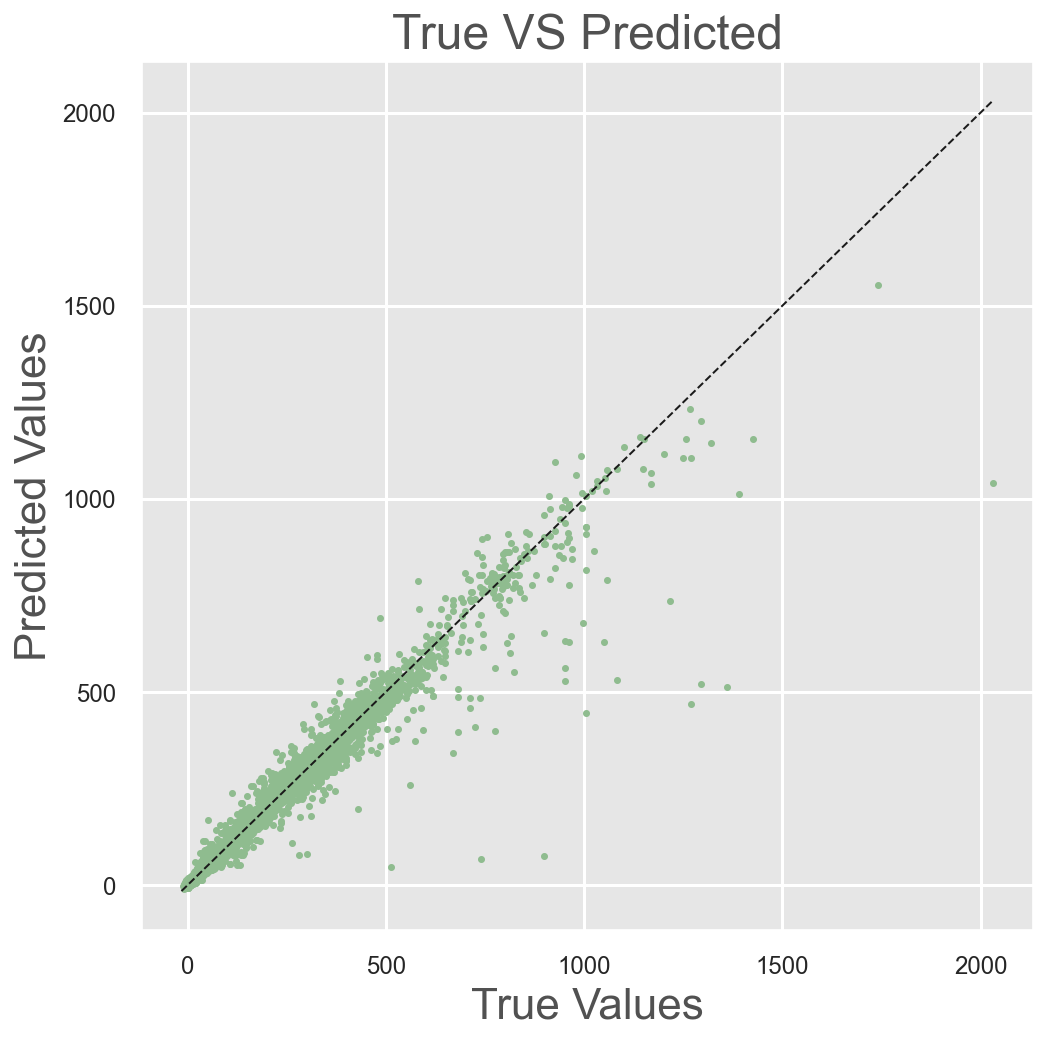

In [440]:
# Visualization
true_vs_predict = pd.DataFrame({'True Values': y_test, 'Predicted Values': pred_test_RFR})

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_test, pred_test_RFR, s=4, color ='darkseagreen')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('True Values', fontsize=22, alpha=0.8)
ax.set_ylabel('Predicted Values', fontsize=22, alpha=0.8)
ax.set_title("True VS Predicted", fontsize=24, alpha=0.8)
plt.tick_params(labelsize=14)
ax.tick_params(axis = 'x', labelsize=12)
ax.tick_params(axis = 'y', labelsize=12)
plt.show()

### HistGradientBoosting

In [424]:
model_HGB = HistGradientBoostingRegressor(random_state = 34)
model_HGB.fit(X_train, y_train)

print('Training Score:', model_HGB.score(X_train, y_train)) 
print('Test Score:', model_HGB.score(X_test, y_test))
print('Cross validation score:', cross_val_score(model_HGB, X_train, y_train, cv=5).mean())

os.system('say “Hey David, your program has finished!“')
joblib.dump(model_HGB, 'model_HGB.jlib')

Training Score: 0.9582747193396755
Test Score: 0.9458545886595112
Cross validation score: 0.9505424493288359


['model_HGB.jlib']

In [437]:
model_HGB = joblib.load('model_HGB.jlib')

pred_train_HGB = model_HGB.predict(X_train)
pred_test_HGB = model_HGB.predict(X_test)

mse_HGB = mean_squared_error(y_test, pred_test_HGB)
print('R2 Score: %.4f' % r2_score(y_test, pred_test_HGB))
print('MSE: %.2f' % mse_HGB)
print('RMSE: %.2f' % (mse_HGB**(1/2.0)))

R2 Score: 0.9459
MSE: 1478.60
RMSE: 38.45


### MLPRegressor

In [425]:
model_MLPR = MLPRegressor(random_state = 34, max_iter = 50000)
model_MLPR.fit(X_train, y_train)

print('Training Score:', model_MLPR.score(X_train, y_train)) 
print('Test Score:', model_MLPR.score(X_test, y_test))
print('Cross validation score:', cross_val_score(model_MLPR, X_train, y_train, cv=5).mean())

os.system('say “Hey David, your program has finished!“')
joblib.dump(model_MLPR, 'model_MLPR.jlib')

Training Score: 0.9752232533563976
Test Score: 0.9635511785522307
Cross validation score: 0.9666740753469231


['model_MLPR.jlib']

In [438]:
model_MLPR = joblib.load('model_MLPR.jlib')

pred_train_MLPR = model_MLPR.predict(X_train)
pred_test_MLPR = model_MLPR.predict(X_test)

mse_MLPR = mean_squared_error(y_test, pred_test_MLPR)
print('R2 Score: %.4f' % r2_score(y_test, pred_test_MLPR))
print('MSE: %.2f' % mse_MLPR)
print('RMSE: %.2f' % (mse_MLPR**(1/2.0)))

R2 Score: 0.9636
MSE: 995.34
RMSE: 31.55


# Present The Results

## Lasso

### Variables with Highest Coefficients

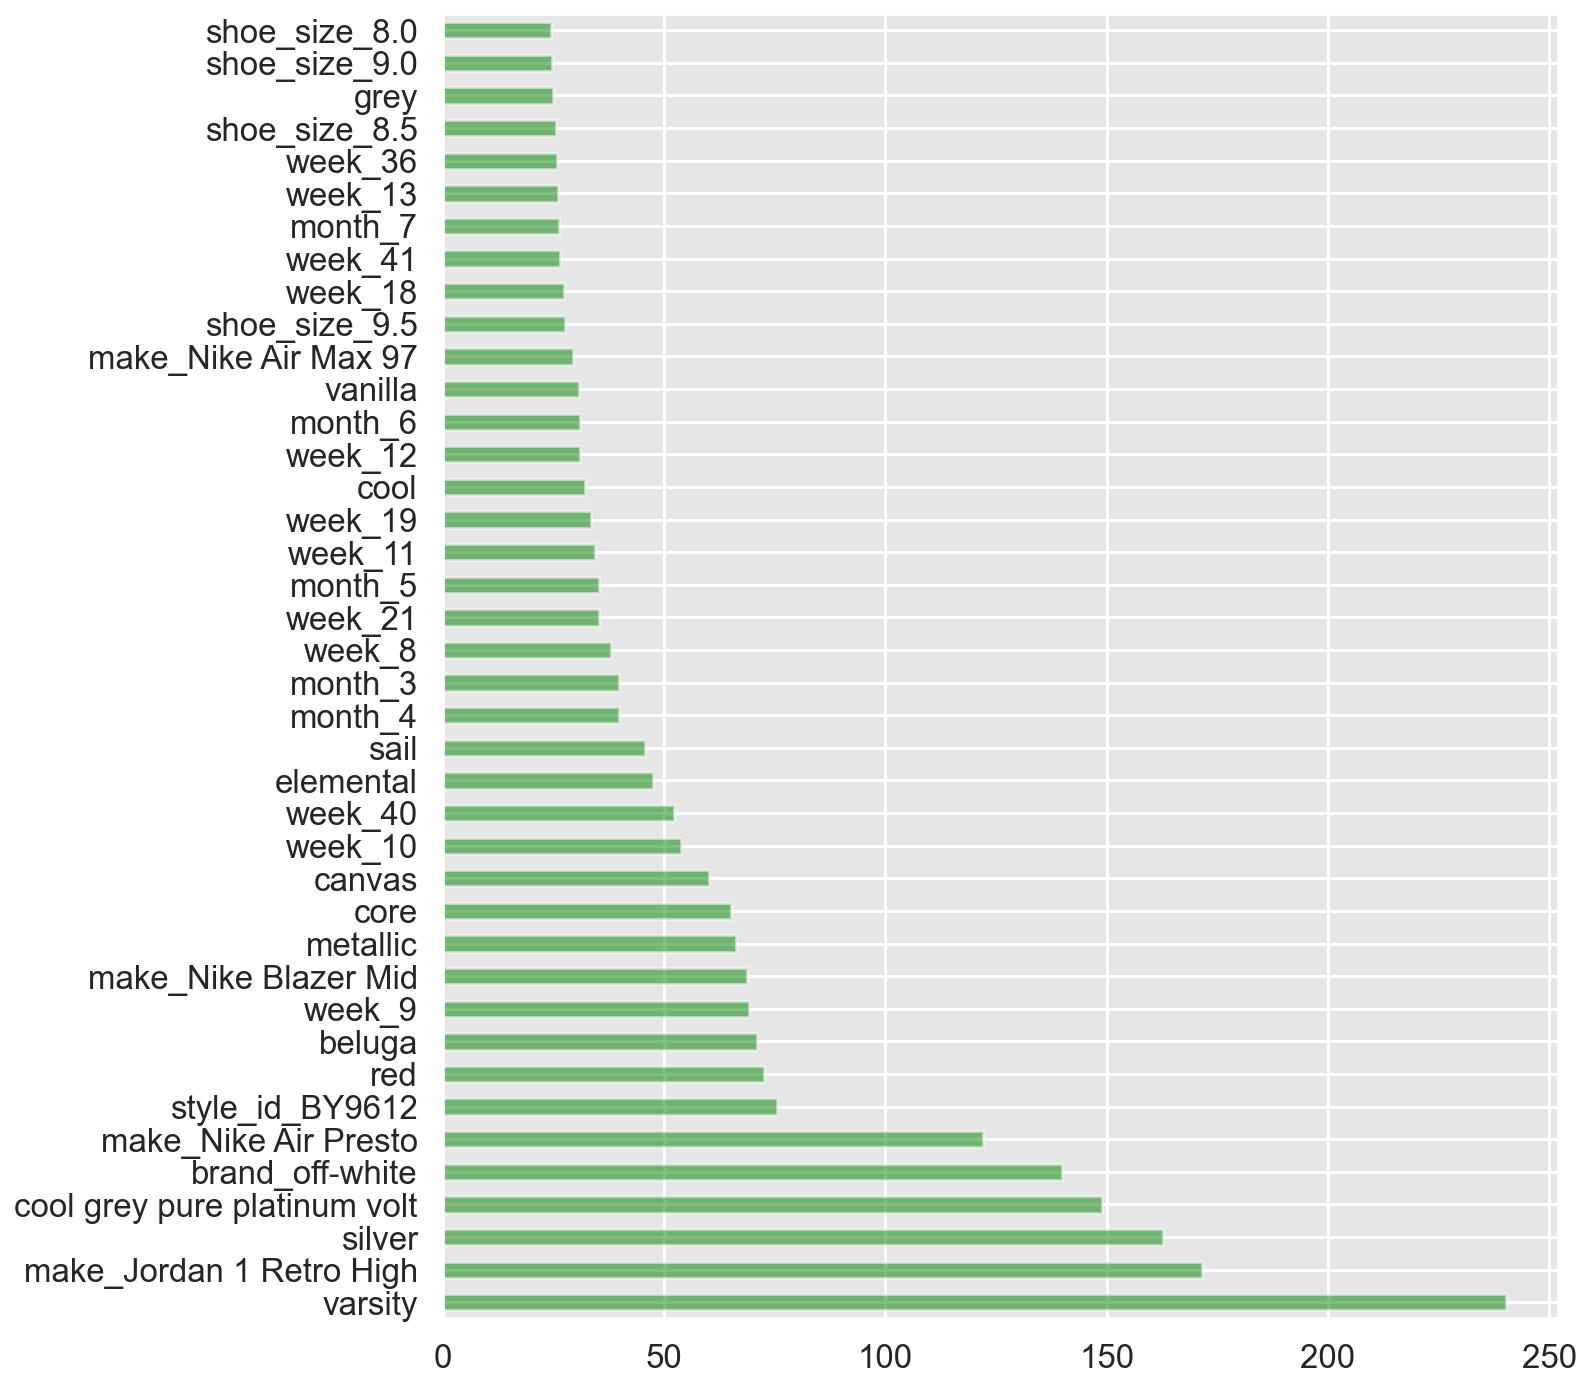

In [480]:
lasso_coefs = pd.DataFrame({'variable': X_train.columns,
                            'coef': best_LASSO.coef_,
                            'abs_coef': np.abs(best_LASSO.coef_)})

lasso_coefs.sort_values('coef', inplace = True, ascending =False)

fig, ax = plt.subplots(figsize=(10, 12))
lasso_coefs.coef[:40].plot(kind='barh', ax=ax, alpha=0.5, color ='green')
ax.set_yticklabels(lasso_coefs.variable[:40].values)
plt.show()

### Type 

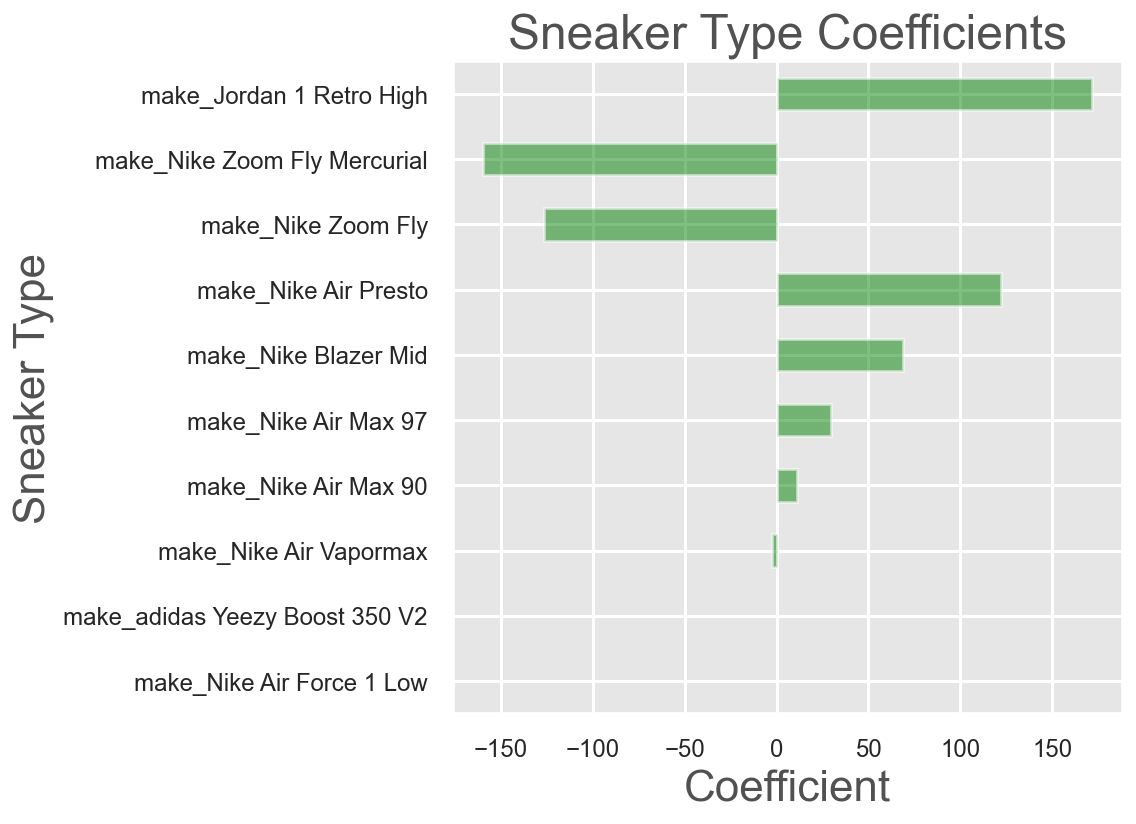

In [514]:
lasso_coefs_make = pd.DataFrame({'variable': X_train.columns[227:],
                            'coef': best_LASSO.coef_[227:],
                            'abs_coef': np.abs(best_LASSO.coef_[227:])})
lasso_coefs_make.sort_values('abs_coef', inplace=True, ascending=True)

fig, ax = plt.subplots(figsize=(6, 6))
lasso_coefs_make.coef.plot(kind='barh', ax=ax, alpha=0.5, color ='green')
ax.set_yticklabels(lasso_coefs_make.variable.values)
plt.title('Sneaker Type Coefficients', fontsize = 24, alpha =0.8)
plt.xlabel('Coefficient', fontsize = 22, alpha =0.8)
plt.ylabel('Sneaker Type', fontsize = 22, alpha =0.8)
plt.tick_params(labelsize=14)
ax.tick_params(axis = 'x', labelsize=12)
ax.tick_params(axis = 'y', labelsize=12)
plt.show()

### Style

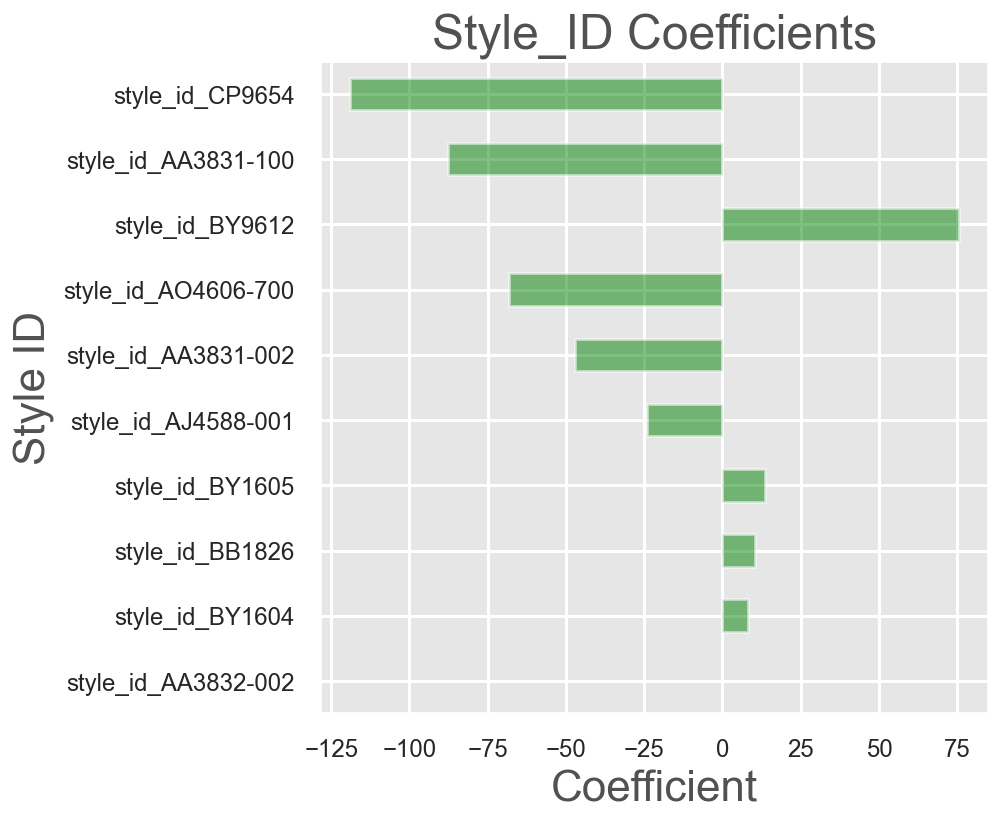

In [496]:
lasso_coefs_style = pd.DataFrame({'variable': X_train.columns[126:159],
                            'coef': best_LASSO.coef_[126:159],
                            'abs_coef': np.abs(best_LASSO.coef_[126:159])})
lasso_coefs_style.sort_values('abs_coef', inplace=True, ascending=True)

fig, ax = plt.subplots(figsize=(6, 6))
lasso_coefs_style[23:].coef.plot(kind='barh', ax=ax, alpha=0.5, color = 'green')
ax.set_yticklabels(lasso_coefs_style[23:].variable.values)

plt.title('Style_ID Coefficients', fontsize = 24, alpha =0.8)
plt.xlabel('Coefficient', fontsize = 22, alpha =0.8)
plt.ylabel('Style ID', fontsize = 22, alpha =0.8)
plt.tick_params(labelsize=14)
ax.tick_params(axis = 'x', labelsize=12)
ax.tick_params(axis = 'y', labelsize=12)
plt.show()

### Day

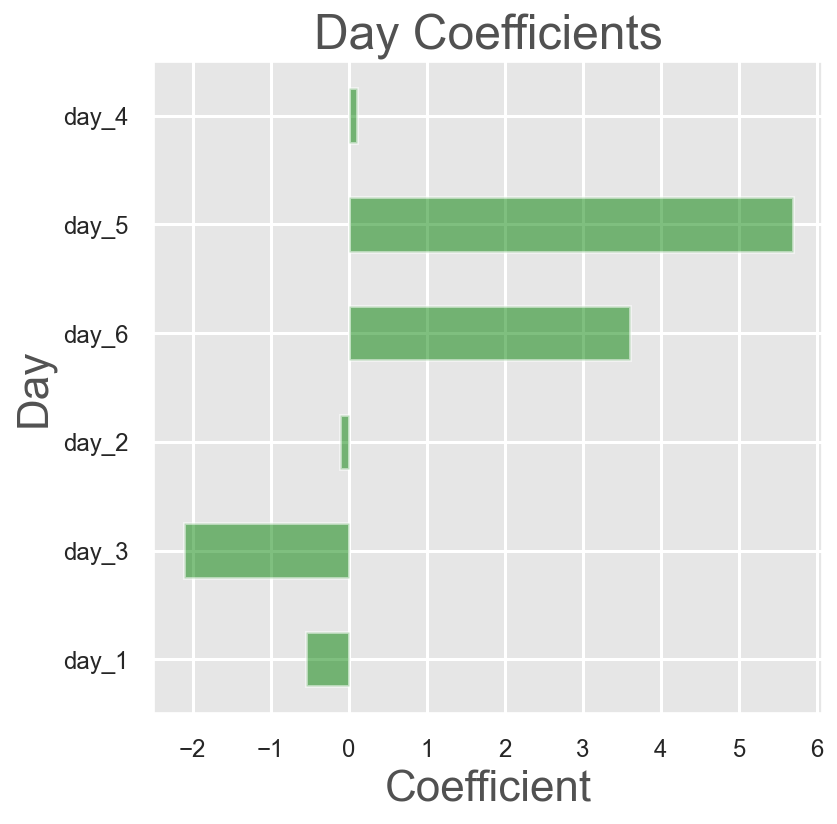

In [510]:
lasso_coefs_day = pd.DataFrame({'variable': X_train.columns[159:165],
                            'coef': best_LASSO.coef_[159:165],
                            'abs_coef': np.abs(best_lasso.coef_[159:165])})
lasso_coefs_day.sort_values('abs_coef', inplace=True, ascending=True)

fig, ax = plt.subplots(figsize=(6, 6))
lasso_coefs_day.coef.plot(kind='barh', ax=ax, alpha=0.5, color = 'green')
ax.set_yticklabels(lasso_coefs_day.variable.values)

plt.title('Day Coefficients', fontsize = 24, alpha =0.8)
plt.xlabel('Coefficient', fontsize = 22, alpha =0.8)
plt.ylabel('Day', fontsize = 22, alpha =0.8)
plt.tick_params(labelsize=14)
ax.tick_params(axis = 'x', labelsize=12)
ax.tick_params(axis = 'y', labelsize=12)
plt.show()

### Week

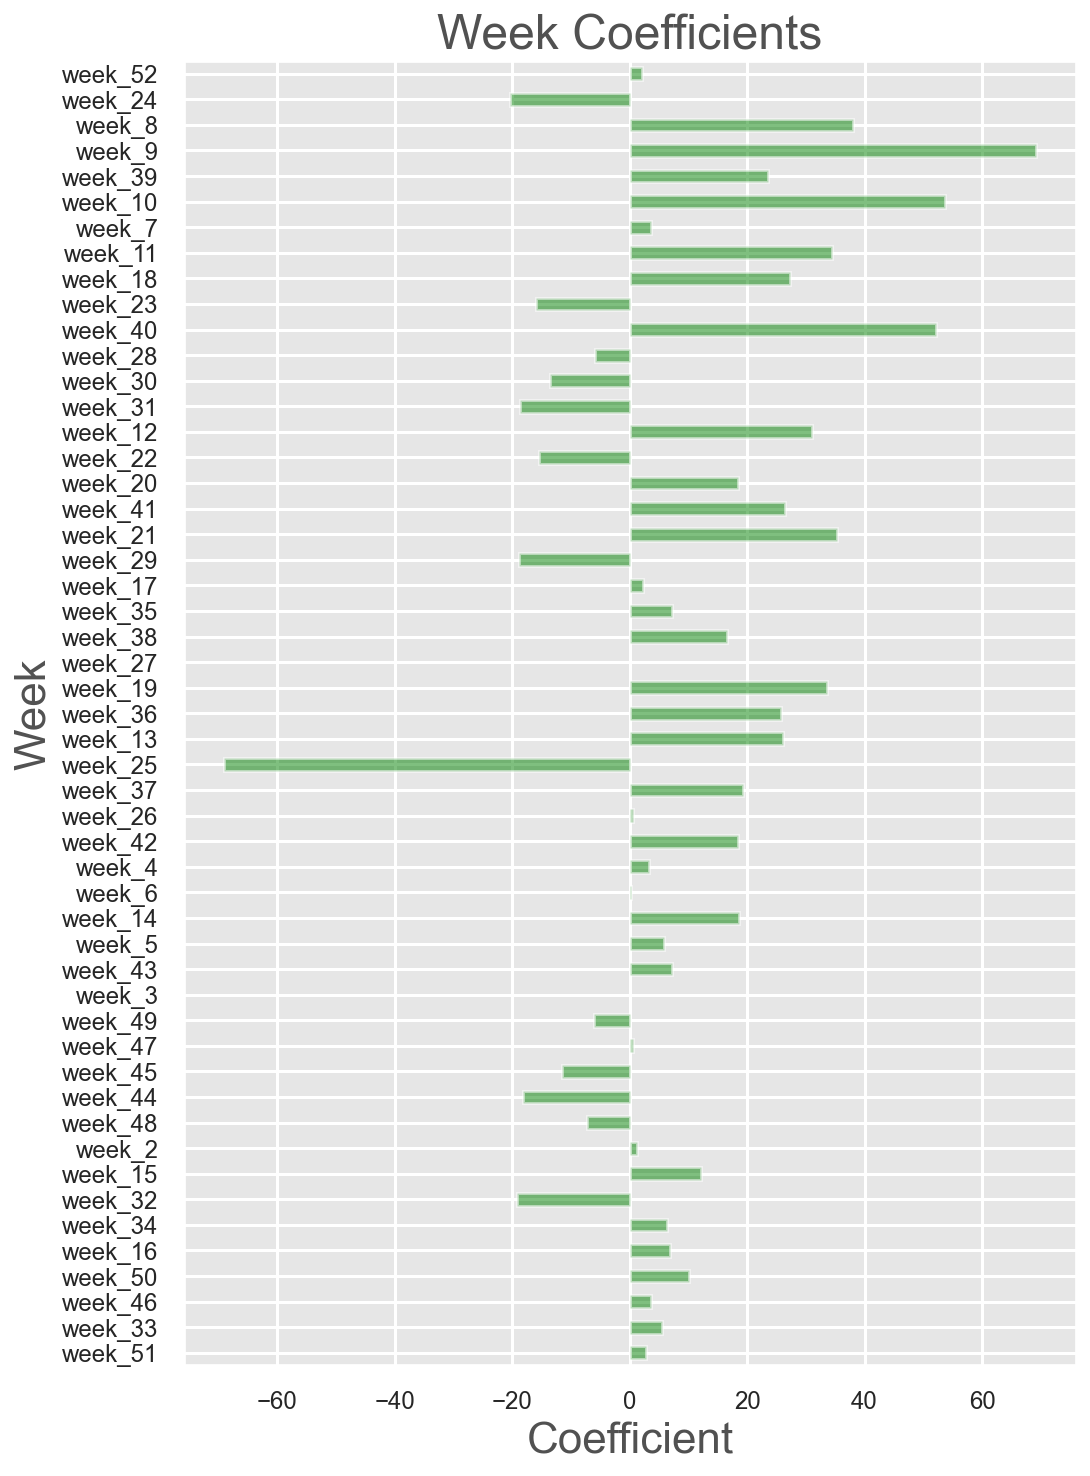

In [525]:
lasso_coefs_week = pd.DataFrame({'variable': X_train.columns[176:227],
                            'coef': best_LASSO.coef_[176:227],
                            'abs_coef': np.abs(best_lasso.coef_[176:227])})

lasso_coefs_week.sort_values('abs_coef', inplace=True, ascending=True)

fig, ax = plt.subplots(figsize=(8, 12))
lasso_coefs_week.coef.plot(kind='barh', ax=ax, alpha=0.5, color = 'green')
ax.set_yticklabels(lasso_coefs_week.variable.values)

plt.title('Week Coefficients', fontsize = 24, alpha =0.8)
plt.xlabel('Coefficient', fontsize = 22, alpha =0.8)
plt.ylabel('Week', fontsize = 22, alpha =0.8)
plt.tick_params(labelsize=14)
ax.tick_params(axis = 'x', labelsize=12)
ax.tick_params(axis = 'y', labelsize=12)
plt.show()

### Month

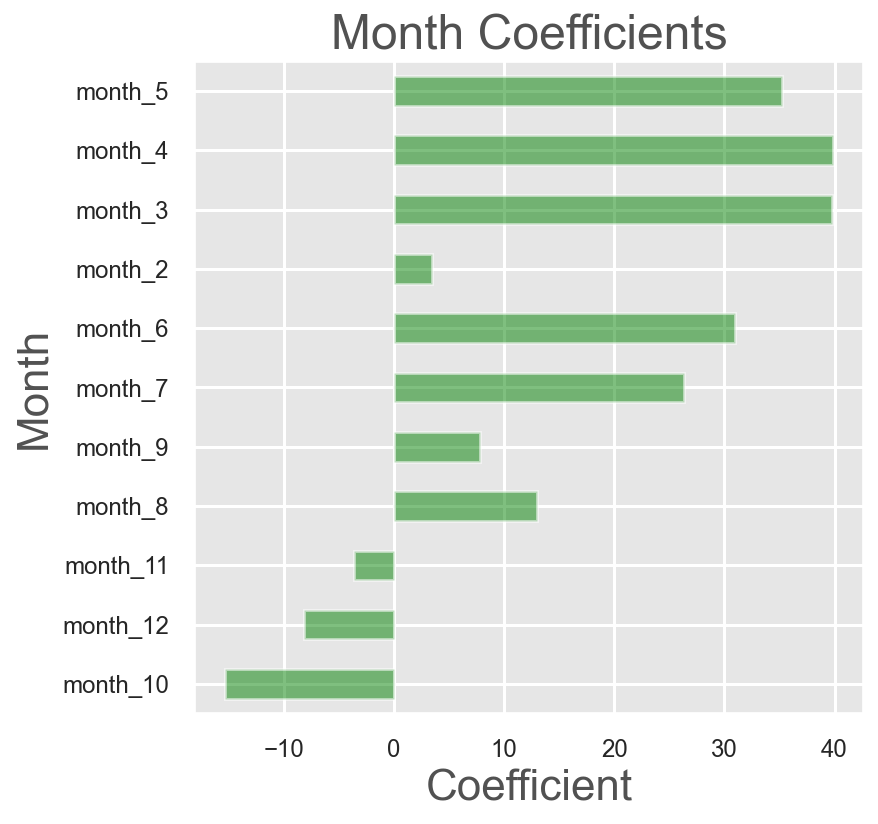

In [526]:
lasso_coefs_month = pd.DataFrame({'variable': X_train.columns[165:176],
                            'coef': best_LASSO.coef_[165:176],
                            'abs_coef': np.abs(best_lasso.coef_[165:176])})
lasso_coefs_month.sort_values('abs_coef', inplace=True, ascending=True)

fig, ax = plt.subplots(figsize=(6, 6))
lasso_coefs_month.coef.plot(kind='barh', ax=ax, alpha=0.5, color = 'green')
ax.set_yticklabels(lasso_coefs_month.variable.values)

plt.title('Month Coefficients', fontsize = 24, alpha =0.8)
plt.xlabel('Coefficient', fontsize = 22, alpha =0.8)
plt.ylabel('Month', fontsize = 22, alpha =0.8)
plt.tick_params(labelsize=14)
ax.tick_params(axis = 'x', labelsize=12)
ax.tick_params(axis = 'y', labelsize=12)
plt.show()

### Size

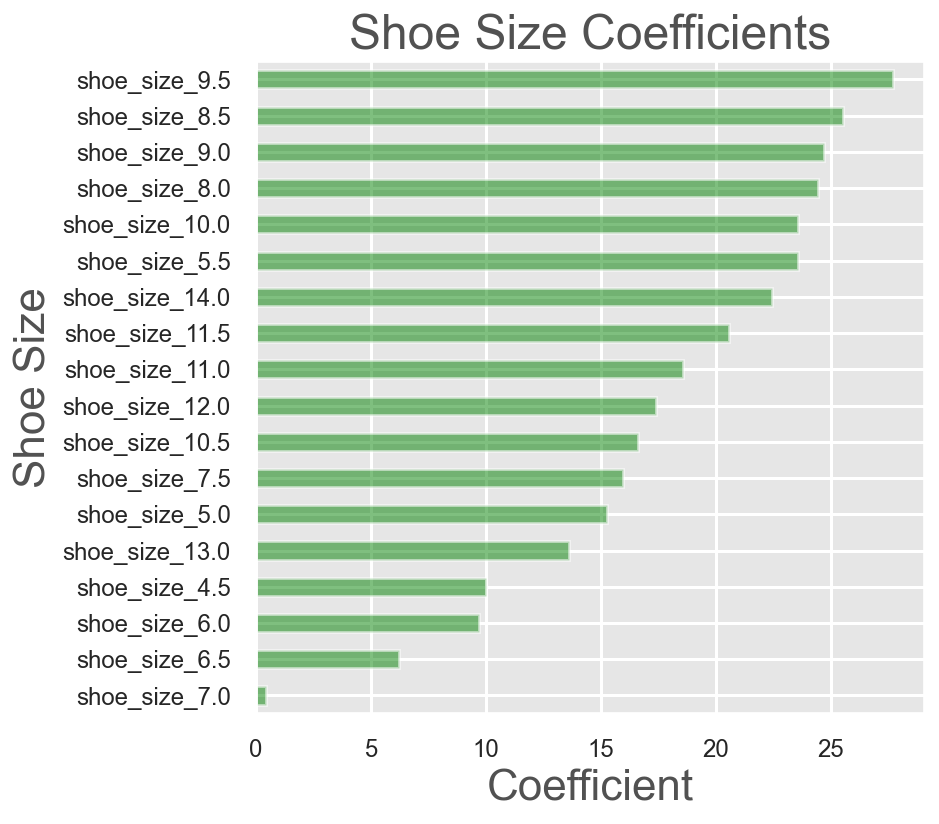

In [527]:
lasso_coefs_size = pd.DataFrame({'variable': X_train.columns[108:126],
                            'coef': best_LASSO.coef_[108:126],
                            'abs_coef': np.abs(best_LASSO.coef_[108:126])})
lasso_coefs_size.sort_values('abs_coef', inplace=True, ascending=True)

fig, ax = plt.subplots(figsize=(6, 6))
lasso_coefs_size.coef.plot(kind='barh', ax=ax, alpha=0.5, color = 'green')
ax.set_yticklabels(lasso_coefs_size.variable.values)

plt.title('Shoe Size Coefficients', fontsize = 24, alpha =0.8)
plt.xlabel('Coefficient', fontsize = 22, alpha =0.8)
plt.ylabel('Shoe Size', fontsize = 22, alpha =0.8)
plt.tick_params(labelsize=14)
ax.tick_params(axis = 'x', labelsize=12)
ax.tick_params(axis = 'y', labelsize=12)
plt.show()

### Color Variable

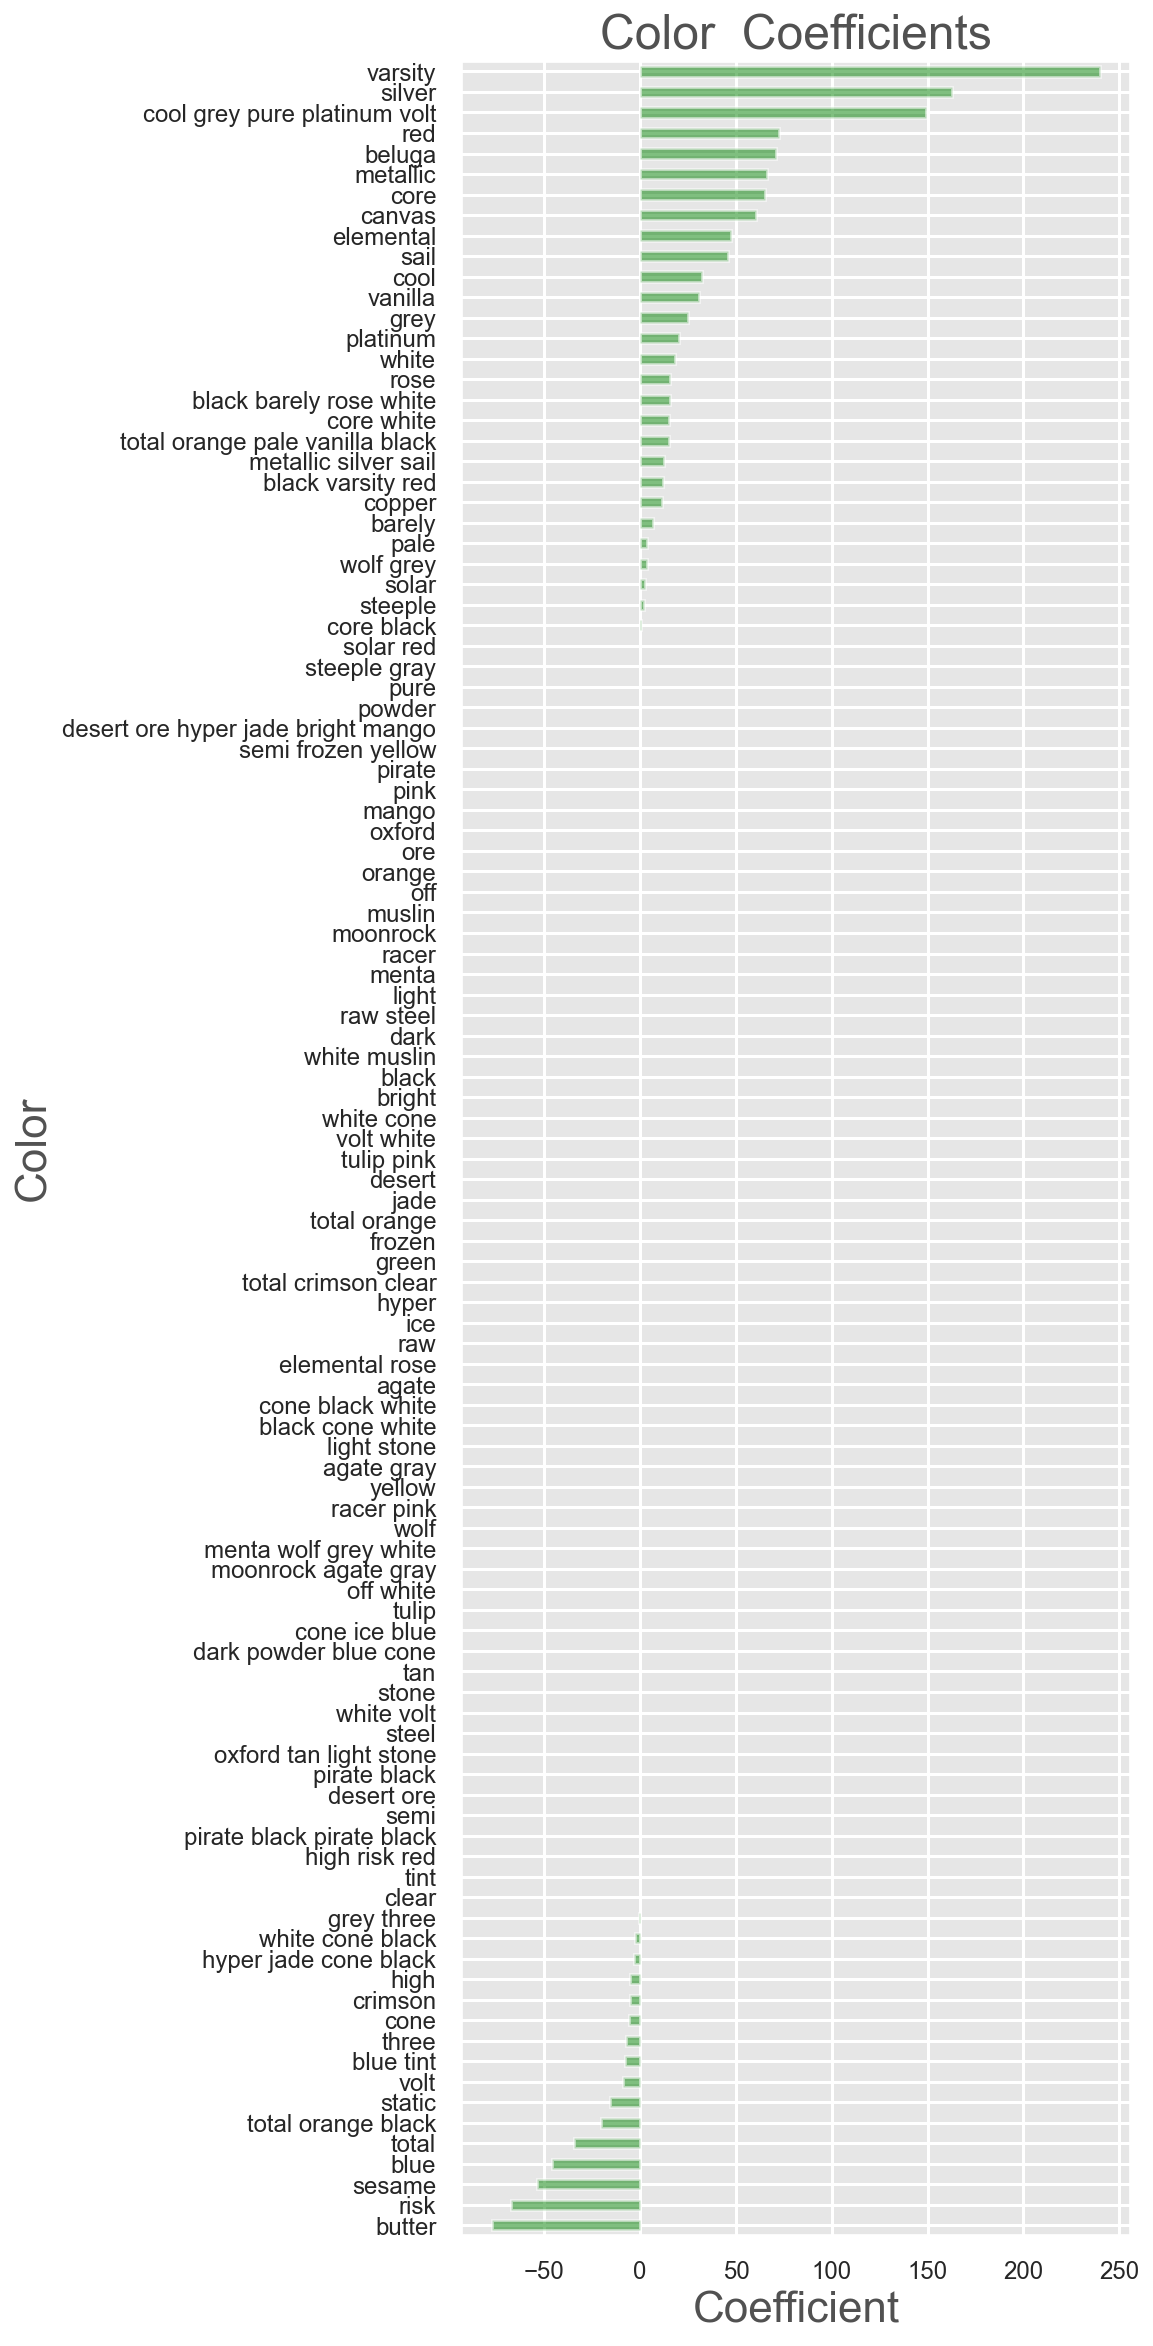

In [528]:
lasso_coefs_color = pd.DataFrame({'variable': X_train.columns[:106],
                            'coef': best_LASSO.coef_[:106],
                            'abs_coef': np.abs(best_LASSO.coef_[:106])})

lasso_coefs_color.sort_values('coef', inplace=True, ascending=True)

fig, ax = plt.subplots(figsize=(6, 20))
lasso_coefs_color.coef.plot(kind='barh', ax=ax, alpha=0.5, color = 'green')
ax.set_yticklabels(lasso_coefs_color.variable.values)

plt.title('Color  Coefficients', fontsize = 24, alpha =0.8)
plt.xlabel('Coefficient', fontsize = 22, alpha =0.8)
plt.ylabel('Color', fontsize = 22, alpha =0.8)
plt.tick_params(labelsize=14)
ax.tick_params(axis = 'x', labelsize=12)
ax.tick_params(axis = 'y', labelsize=12)
plt.show()

## RandomForest Regressor

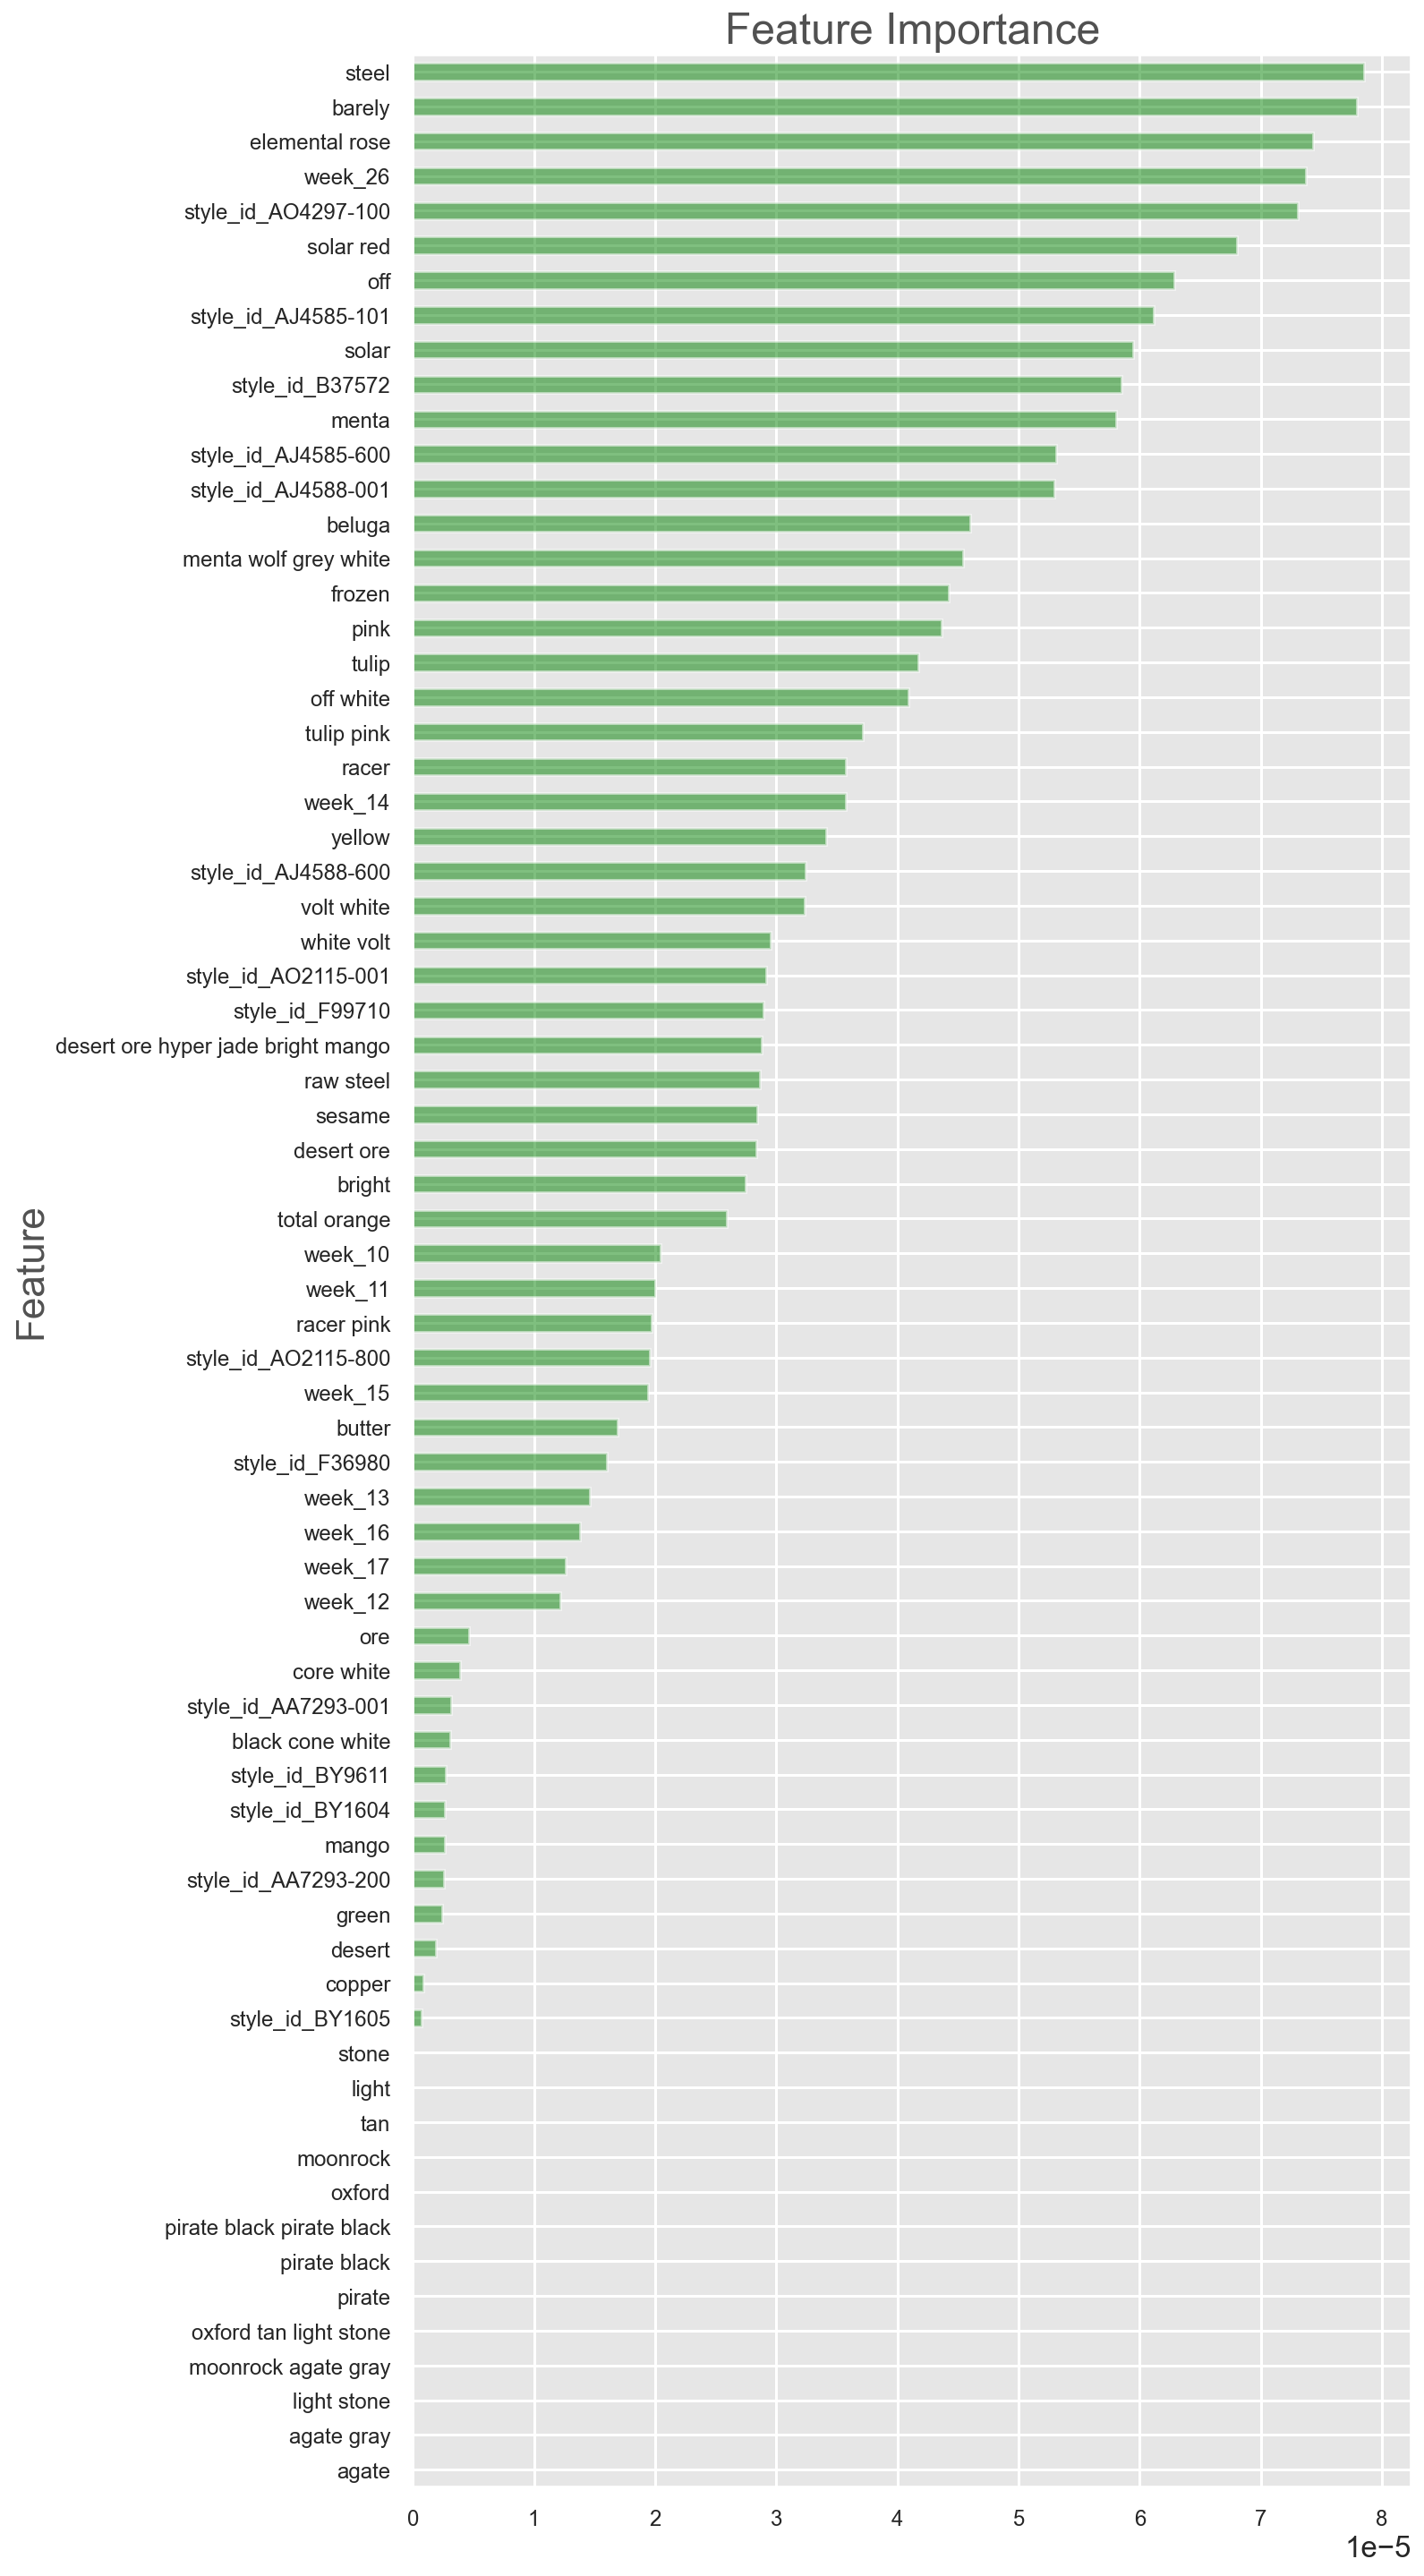

In [543]:
RFR_feature_importance = pd.DataFrame({'variable': X_train.columns,
                            'coef':model_RFR.feature_importances_,
                            'abs_coef': np.abs(model_RFR.feature_importances_)})
RFR_feature_importance.sort_values('coef', inplace = True, ascending = True)
#Visualization of Coefficients
fig, ax = plt.subplots(figsize=(10, 25))
RFR_feature_importance[:70].coef.plot(kind='barh', ax=ax, alpha=0.5, color = 'green')
ax.set_yticklabels(RFR_feature_importance[:70].variable.values)

plt.title('Feature Importance', fontsize = 24, alpha =0.8)
plt.ylabel('Feature', fontsize = 22, alpha =0.8)
plt.tick_params(labelsize=14)
ax.tick_params(axis = 'x', labelsize=12)
ax.tick_params(axis = 'y', labelsize=12)
plt.show()

This final RandomForestRegressor model can be used for deployment with a web application.